The air travel industry has seen a significant influx in passengers in recent years, which means that air travel data has become more important than ever. Specifically, predicting ticket prices is important, but since ticket prices fluctuate very often, it is not always possible to get the predictions exactly correct. The dataset in this project contains details of over 10000 individual flights, including airline, departure and arrival times, and total stops.

## Part 1: Exploratory Data Analysis (EDA)/Data Preprocessing

In [65]:
#Load in libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from sklearn.preprocessing import MultiLabelBinarizer

In [66]:
# Load the .xlsx file into a DataFrame
df_flights = pd.read_excel("format3.xlsx")

df_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10682 entries, 0 to 10681
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10681 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10681 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.1+ KB


All of the variables are read in as object variables except for Price.

In [67]:
#View first 5 rows of the dataframe
df_flights.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


The values in the Source and Destination variables indicate that this dataset contains data from flights all across India.

In [68]:
#Get value counts of Airline variable
df_flights['Airline'].value_counts()

,count
Airline,
Jet Airways,3849
IndiGo,2053
Air India,1752
Multiple carriers,1196
SpiceJet,818
Vistara,479
Air Asia,319
GoAir,194
Multiple carriers Premium economy,13


The most common airline in this dataset is Jet Airways, followed by IndiGo and Air India. Some categories specify business or premium economy, but since these categories are very small, they can be merged into the base airline name.

,count
Airline,
Jet Airways,3855
IndiGo,2053
Air India,1752
Multiple carriers,1209
SpiceJet,818
Vistara,482
Air Asia,319
GoAir,194


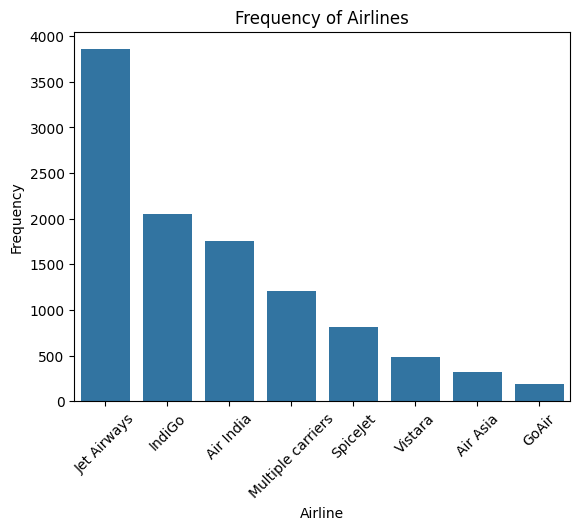

In [69]:
#Merge small categories
df_flights['Airline'] = df_flights['Airline'].replace('Multiple carriers Premium economy', 'Multiple carriers')
df_flights['Airline'] = df_flights['Airline'].replace('Jet Airways Business', 'Jet Airways')
df_flights['Airline'] = df_flights['Airline'].replace('Vistara Premium economy', 'Vistara')
display(df_flights['Airline'].value_counts())
#Create a barplot
category_counts = df_flights['Airline'].value_counts()
sns.barplot(x=category_counts.index, y=category_counts.values)

#Customize the plot
plt.xlabel('Airline')
plt.ylabel('Frequency')
plt.title('Frequency of Airlines')
plt.xticks(rotation=45)
plt.show()

In [70]:
#Convert Date_of_Journey to datetime variable
df_flights['Date_of_Journey'] = pd.to_datetime(df_flights['Date_of_Journey'], format='%d/%m/%Y')
df_flights.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


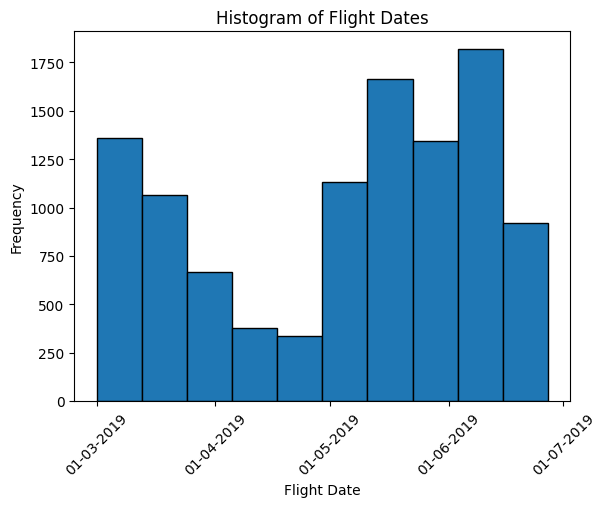

In [71]:
#Show histogram of flight dates
plt.hist(df_flights['Date_of_Journey'], bins=10, edgecolor='black')

#Set labels and title
plt.xlabel('Flight Date')
plt.ylabel('Frequency')
plt.title('Histogram of Flight Dates')

# Rotate x-axis labels
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.xticks(rotation=45)

#Display the plot
plt.show()

The code above shows a histogram of all flight dates, in dd-mm-yyyy format, in the dataset. The start and end points show the date range this data is taken from: March 1, 2019 to July 1, 2019. The histogram also shows that a majority of the flights were in May or June, compared to March or April.

In [72]:
#Get value counts for Source and Destination
display(df_flights['Source'].value_counts())
display(df_flights['Destination'].value_counts())

,count
Source,
Delhi,4537
Kolkata,2871
Banglore,2197
Mumbai,696
Chennai,381


,count
Destination,
Cochin,4537
Banglore,2871
Delhi,1265
New Delhi,932
Hyderabad,696
Kolkata,381


When looking at the value counts for flight source and destination, there is an imbalance of possible values. There are only 5 possible values for Source, compared to 6 for Destination, and only 3 places appear in both variables: Delhi, Kolkata, and Bangalore. This means that 2 places, Mumbai and Chennai, are strictly places of departure, while 3 places, Colchin, New Delhi, and Hyderabad, are strictly places of arrival. However, the value counts for each variable can somewhat be mapped to each other, since there are multiple places in each variable with the exact same number of value counts. For example, Delhi (Source) can be mapped to Cochin (Destination), as they both have exactly 4537 entries in their respective columns. This means that only one of these variables will be useful in modeling, since using two variables that contain the same information is redundant. Since Destination has more possible values than Source, this means that Destination contains all of Source's information, plus a bit of extra useful information. Therefore, for the modeling section of this project, Source will be removed, but the mapping between Source and Destination may still be important for real-world analysis.

In [73]:
#Confirming that Source and Destination can be mapped to each other
df_filtered = df_flights[(df_flights['Source'] == 'Delhi') & (df_flights['Destination'] == 'Cochin')]
df_filtered.shape

(4537, 11)

Just as suspected, the number of rows that meet the criteria Source == Delhi and Destination == Cochin is equal to the number of values equal to Delhi in Source and the number of values equal to Cochin in Destination. This means that Source being equal to Delhi is equivalent to Destination being equal to Cochin. This structure is most likely present for all 5 mappings detailed in the value counts for each column, so only one column, Destination, will be necessary. Here are the specific mappings:

* Delhi (Source) to Cochin (Destination)

* Kolkata (Source) to Bangalore (Destination)

* Bangalore (Source) to Delhi/New Delhi (Destination)

* Mumbai (Source) to Hyderabad (Destination)

* Chennai (Source) to Kolkata (Destination)

In [74]:
#Convert Route variable to dummy variables indicating each airport's presence in each flight

#Step 1: Remove all NaNs from the dataframe
df_flights = df_flights.dropna()

#Step 2: Split the route into a list of airports
df_flights['airports'] = df_flights['Route'].str.split(' → ')

#Step 3: Use MultiLabelBinarizer to create dummy variables
mlb = MultiLabelBinarizer()
dummy_df = pd.DataFrame(mlb.fit_transform(df_flights['airports']), columns=mlb.classes_, index=df_flights.index)

dummy_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10681 entries, 0 to 10681
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   AMD     10681 non-null  int64
 1   ATQ     10681 non-null  int64
 2   BBI     10681 non-null  int64
 3   BDQ     10681 non-null  int64
 4   BHO     10681 non-null  int64
 5   BLR     10681 non-null  int64
 6   BOM     10681 non-null  int64
 7   CCU     10681 non-null  int64
 8   COK     10681 non-null  int64
 9   DED     10681 non-null  int64
 10  DEL     10681 non-null  int64
 11  GAU     10681 non-null  int64
 12  GOI     10681 non-null  int64
 13  GWL     10681 non-null  int64
 14  HBX     10681 non-null  int64
 15  HYD     10681 non-null  int64
 16  IDR     10681 non-null  int64
 17  IMF     10681 non-null  int64
 18  ISK     10681 non-null  int64
 19  IXA     10681 non-null  int64
 20  IXB     10681 non-null  int64
 21  IXC     10681 non-null  int64
 22  IXR     10681 non-null  int64
 23  IXU     10681 no

<ipython-input-74-3c4c98f7a206>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_flights['airports'] = df_flights['Route'].str.split(' → ')


Despite the fact that there are only 6 different Destination variables, there are 41 different airports that show up in this dataset. This is because the vast majority of airports in this dataset are used as temporary stops on a route between two other airports.

In [75]:
#Sort all airports by frequency of usage in dataset (percent)
pd.set_option('display.max_columns', None)
dummy_df.describe().T.sort_values(by='mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
DEL,10681.0,0.704428,0.456321,0.0,0.0,1.0,1.0,1.0
BOM,10681.0,0.531411,0.499036,0.0,0.0,1.0,1.0,1.0
BLR,10681.0,0.496583,0.500012,0.0,0.0,0.0,1.0,1.0
COK,10681.0,0.432918,0.495503,0.0,0.0,0.0,1.0,1.0
CCU,10681.0,0.311581,0.463161,0.0,0.0,0.0,1.0,1.0
HYD,10681.0,0.119652,0.324569,0.0,0.0,0.0,0.0,1.0
MAA,10681.0,0.067878,0.251547,0.0,0.0,0.0,0.0,1.0
AMD,10681.0,0.027994,0.164962,0.0,0.0,0.0,0.0,1.0
JAI,10681.0,0.024436,0.154405,0.0,0.0,0.0,0.0,1.0
BBI,10681.0,0.012078,0.109237,0.0,0.0,0.0,0.0,1.0


When sorting each airport (denoted by three-letter combination) by percentage of flight routes the airport is present in, the top airport is the Delhi airport, at 70.4%. This should not be a surprise, as it is one of three airports that are both a source and a final destination in this dataset. The second highest on this list is the Mumbai airport, at 53.1%, followed by Bangalore at 49.7%, Cochin at 43.3%, and Kolkata at 31.2%. The highest-ranked airport that is neither a source nor a destination is the Gujarat airport, with only 2.8% of flights in this dataset passing through this airport.

In [76]:
#Convert Dep_Time to datetime variable
df_flights['Dep_Time'] = pd.to_datetime(df_flights['Dep_Time'], format='%H:%M')
df_flights.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10681 entries, 0 to 10681
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10681 non-null  object        
 1   Date_of_Journey  10681 non-null  datetime64[ns]
 2   Source           10681 non-null  object        
 3   Destination      10681 non-null  object        
 4   Route            10681 non-null  object        
 5   Dep_Time         10681 non-null  datetime64[ns]
 6   Arrival_Time     10681 non-null  object        
 7   Duration         10681 non-null  object        
 8   Total_Stops      10681 non-null  object        
 9   Additional_Info  10681 non-null  object        
 10  Price            10681 non-null  int64         
 11  airports         10681 non-null  object        
dtypes: datetime64[ns](2), int64(1), object(9)
memory usage: 1.1+ MB


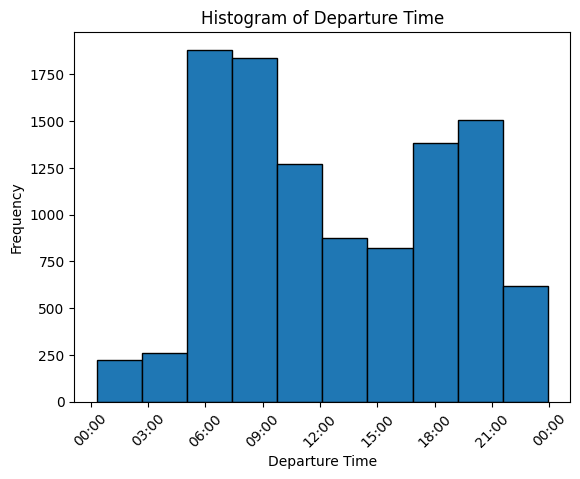

In [77]:
#Show histogram of departure times
plt.hist(df_flights['Dep_Time'], bins=10, edgecolor='black')

#Set labels and title
plt.xlabel('Departure Time')
plt.ylabel('Frequency')
plt.title('Histogram of Departure Time')

# Customize the x-axis to show only the hour
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

# Rotate x-axis labels
plt.xticks(rotation=45)

#Display the plot
plt.show()

The code above displays a histogram that shows the frequency for each time of day. The most frequent times are between 6 and 9 AM and between 6 and 9 PM. The AM departures are associated with business travelers, who prefer to fly during a time that will not interfere with their work day. The PM departures are associated with people who want to take overnight flights, arriving the next morning at their destination.

In [78]:
df_flights.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,airports
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,1900-01-01 22:20:00,01:10 22 Mar,2h 50m,non-stop,No info,3897,"[BLR, DEL]"
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,1900-01-01 05:50:00,13:15,7h 25m,2 stops,No info,7662,"[CCU, IXR, BBI, BLR]"
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,1900-01-01 09:25:00,04:25 10 Jun,19h,2 stops,No info,13882,"[DEL, LKO, BOM, COK]"
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,1900-01-01 18:05:00,23:30,5h 25m,1 stop,No info,6218,"[CCU, NAG, BLR]"
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,1900-01-01 16:50:00,21:35,4h 45m,1 stop,No info,13302,"[BLR, NAG, DEL]"


In [79]:
# Function to clean Arrival_Time
def clean_arrival_time(arrival_time):
    # Check if the format contains a date (space followed by a day and month)
    if ' ' in arrival_time and len(arrival_time.split(' ')) == 3:
        # Keep only the time portion
        return arrival_time.split(' ')[0]
    else:
        # Return as-is for rows that already match the format
        return arrival_time

# Apply the cleaning function
df_flights['Arrival_Time'] = df_flights['Arrival_Time'].apply(clean_arrival_time)
df_flights['Arrival_Time'] = pd.to_datetime(df_flights['Arrival_Time'], format='%H:%M')

# Display the cleaned DataFrame
df_flights.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10681 entries, 0 to 10681
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10681 non-null  object        
 1   Date_of_Journey  10681 non-null  datetime64[ns]
 2   Source           10681 non-null  object        
 3   Destination      10681 non-null  object        
 4   Route            10681 non-null  object        
 5   Dep_Time         10681 non-null  datetime64[ns]
 6   Arrival_Time     10681 non-null  datetime64[ns]
 7   Duration         10681 non-null  object        
 8   Total_Stops      10681 non-null  object        
 9   Additional_Info  10681 non-null  object        
 10  Price            10681 non-null  int64         
 11  airports         10681 non-null  object        
dtypes: datetime64[ns](3), int64(1), object(8)
memory usage: 1.3+ MB


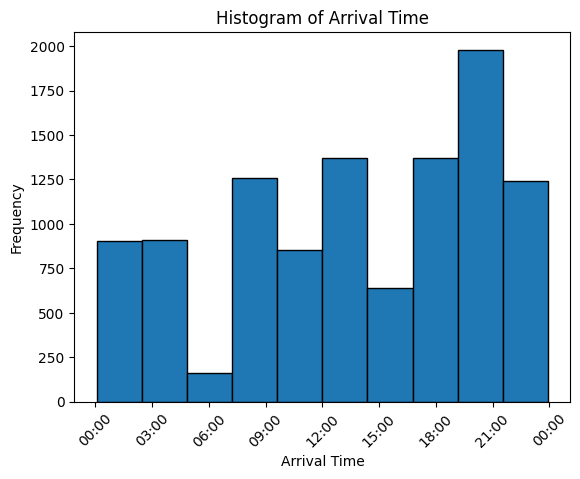

In [80]:
#Show histogram of arrival times
plt.hist(df_flights['Arrival_Time'], bins=10, edgecolor='black')

#Set labels and title
plt.xlabel('Arrival Time')
plt.ylabel('Frequency')
plt.title('Histogram of Arrival Time')

# Customize the x-axis to show only the hour
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

# Rotate x-axis labels
plt.xticks(rotation=45)

#Display the plot
plt.show()

The most common arrival times are around 9:00 PM, which makes sense because this is around the time most people need to get back home and prepare for the next day.

In [81]:
# Function to convert duration to total hours
def duration_to_hours(duration):
    # Initialize hours and minutes
    hours = 0
    minutes = 0

    # Extract hours if present
    if 'h' in duration:
        hours = int(duration.split('h')[0])
    # Extract minutes if present
    if 'm' in duration:
        minutes = int(duration.split('h')[-1].replace('m', '').strip())

    # Calculate total hours
    return hours + minutes / 60

# Apply the function to the Duration column
df_flights['Duration'] = df_flights['Duration'].apply(duration_to_hours)

df_flights.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,airports
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,1900-01-01 22:20:00,1900-01-01 01:10:00,2.833333,non-stop,No info,3897,"[BLR, DEL]"
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,1900-01-01 05:50:00,1900-01-01 13:15:00,7.416667,2 stops,No info,7662,"[CCU, IXR, BBI, BLR]"
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,1900-01-01 09:25:00,1900-01-01 04:25:00,19.000000,2 stops,No info,13882,"[DEL, LKO, BOM, COK]"
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,1900-01-01 18:05:00,1900-01-01 23:30:00,5.416667,1 stop,No info,6218,"[CCU, NAG, BLR]"
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,1900-01-01 16:50:00,1900-01-01 21:35:00,4.750000,1 stop,No info,13302,"[BLR, NAG, DEL]"


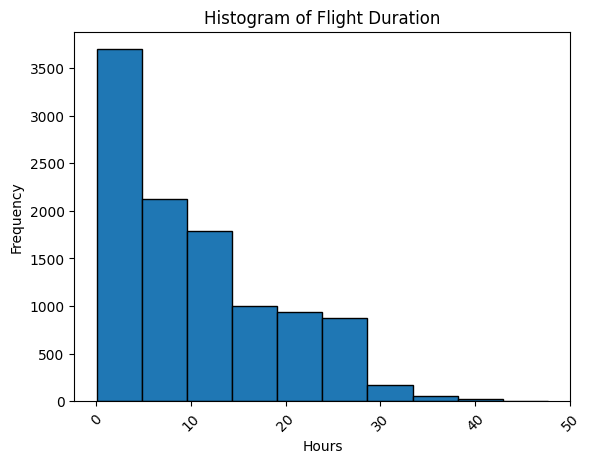

In [82]:
#Show histogram of arrival times
plt.hist(df_flights['Duration'], bins=10, edgecolor='black')

#Set labels and title
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.title('Histogram of Flight Duration')

# Rotate x-axis labels
plt.xticks(rotation=45)

#Display the plot
plt.show()

The flight duration variable is right-skewed, which indicates that a high proportion of flights are relatively short, with a few long flights. The presence of such a skewed variable suggests that models that are sensitive to the scale and distribution of predictors may not perform as well when using the untransformed Duration variable.

,count
Total_Stops,
1 stop,5624
non-stop,3491
2 stops,1520
3 stops,45
4 stops,1


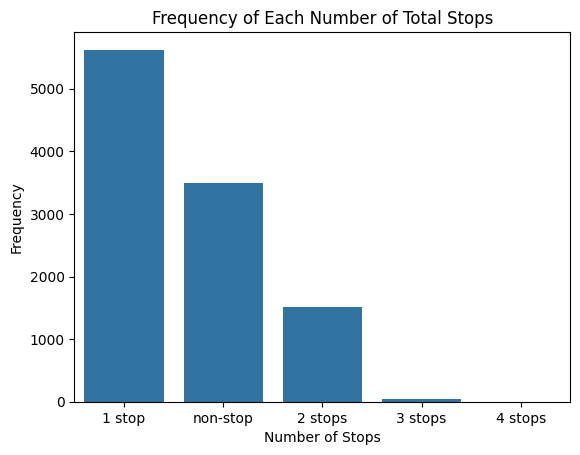

In [83]:
#View value counts for total number of stops
display(df_flights['Total_Stops'].value_counts())

#Create a barplot
category_counts = df_flights['Total_Stops'].value_counts()
sns.barplot(x=category_counts.index, y=category_counts.values)

#Customize the plot
plt.xlabel('Number of Stops')
plt.ylabel('Frequency')
plt.title('Frequency of Each Number of Total Stops')
plt.show()

Most flights in the dataset have exactly one stop between the source and the destination, with 5624 of 10682 flights meeting this criteria. There are 3491 non-stop flights, 1520 2-stop flights, 45 3-stop flights, and 1 flight with the maximum 4 stops. Since there are only 5 categories, encoding this variable into integers should not be too difficult.

In [84]:
#Encode Total_Stops variable into integer variable
df_flights['Total_Stops'] = df_flights['Total_Stops'].map({'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4})
df_flights.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10681 entries, 0 to 10681
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10681 non-null  object        
 1   Date_of_Journey  10681 non-null  datetime64[ns]
 2   Source           10681 non-null  object        
 3   Destination      10681 non-null  object        
 4   Route            10681 non-null  object        
 5   Dep_Time         10681 non-null  datetime64[ns]
 6   Arrival_Time     10681 non-null  datetime64[ns]
 7   Duration         10681 non-null  float64       
 8   Total_Stops      10681 non-null  int64         
 9   Additional_Info  10681 non-null  object        
 10  Price            10681 non-null  int64         
 11  airports         10681 non-null  object        
dtypes: datetime64[ns](3), float64(1), int64(2), object(6)
memory usage: 1.3+ MB


In [85]:
#Show value counts for Additional_Info variable
df_flights['Additional_Info'].value_counts()

,count
Additional_Info,
No info,8343
In-flight meal not included,1982
No check-in baggage included,320
1 Long layover,19
Change airports,7
Business class,4
No Info,3
1 Short layover,1
Red-eye flight,1


Most of the flights have no additional information, with 8346 flights in the No info/No Info (this will have to be fixed later) category of Additional_Info. The most common additional information is "In-flight meal not included," followed by "No check-in baggage included." All of the additional information categories describe negative conditions or setbacks associated with each flight, so the values that are neither No info nor No Info can all be merged into one value indicating the presence of at least one negative condition or setback.

In [86]:
#Change No Info category to No info
df_flights['Additional_Info'] = df_flights['Additional_Info'].replace('No Info', 'No info')

#Show value counts for Additional_Info variable
df_flights['Additional_Info'].value_counts()

,count
Additional_Info,
No info,8346
In-flight meal not included,1982
No check-in baggage included,320
1 Long layover,19
Change airports,7
Business class,4
1 Short layover,1
Red-eye flight,1
2 Long layover,1


In [87]:
#Merge all categories except No info into one category named Issue Present

#Specify the category to keep
keep_category = 'No info'

#Create a new variable with merged categories
df_flights['Additional_Info'] = df_flights['Additional_Info'].apply(lambda x: x if x == keep_category else 'Issue_Present')

#Show value counts for Additional_Info variable
df_flights['Additional_Info'].value_counts()

,count
Additional_Info,
No info,8346
Issue_Present,2335


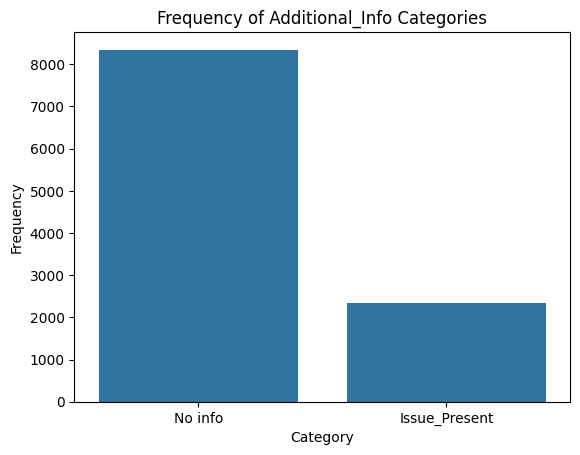

In [88]:
#Create a barplot
category_counts = df_flights['Additional_Info'].value_counts()
sns.barplot(x=category_counts.index, y=category_counts.values)

#Customize the plot
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Frequency of Additional_Info Categories')
plt.show()

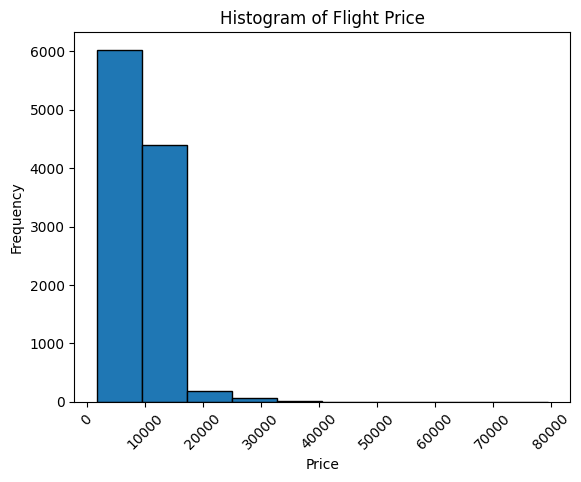

In [89]:
#Show histogram of price
plt.hist(df_flights['Price'], bins=10, edgecolor='black')

#Set labels and title
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Flight Price')

# Rotate x-axis labels
plt.xticks(rotation=45)

#Display the plot
plt.show()

The flight price variable is extremely right-skewed, suggesting that the majority of flights are relatively cheap, with a few very expensive flights also present in the dataset. Since this is the y variable, when performing a model that assumes normality, such as a linear model, it would be a good idea to perform a log-transformation on this variable to reduce skewness. This would involve adjusting the way the model is interpreted, as the coefficients would not predict price, but the log of price.

In [90]:
#Re-encode Dep_Time and Arrival_Time as hour of day integer variables (0-23)
df_flights['Dep_Time'] = df_flights['Dep_Time'].dt.hour
df_flights['Arrival_Time'] = df_flights['Arrival_Time'].dt.hour
df_flights.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,airports
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22,1,2.833333,0,No info,3897,"[BLR, DEL]"
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,5,13,7.416667,2,No info,7662,"[CCU, IXR, BBI, BLR]"
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,9,4,19.000000,2,No info,13882,"[DEL, LKO, BOM, COK]"
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18,23,5.416667,1,No info,6218,"[CCU, NAG, BLR]"
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16,21,4.750000,1,No info,13302,"[BLR, NAG, DEL]"


In [91]:
#Convert Date_of_Journey variable to numerical variable (days since 2019-01-01)
df_flights['Date_of_Journey'] = (df_flights['Date_of_Journey'] - pd.to_datetime('2019-01-01')).dt.days
df_flights.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,airports
0,IndiGo,82,Banglore,New Delhi,BLR → DEL,22,1,2.833333,0,No info,3897,"[BLR, DEL]"
1,Air India,120,Kolkata,Banglore,CCU → IXR → BBI → BLR,5,13,7.416667,2,No info,7662,"[CCU, IXR, BBI, BLR]"
2,Jet Airways,159,Delhi,Cochin,DEL → LKO → BOM → COK,9,4,19.000000,2,No info,13882,"[DEL, LKO, BOM, COK]"
3,IndiGo,131,Kolkata,Banglore,CCU → NAG → BLR,18,23,5.416667,1,No info,6218,"[CCU, NAG, BLR]"
4,IndiGo,59,Banglore,New Delhi,BLR → NAG → DEL,16,21,4.750000,1,No info,13302,"[BLR, NAG, DEL]"


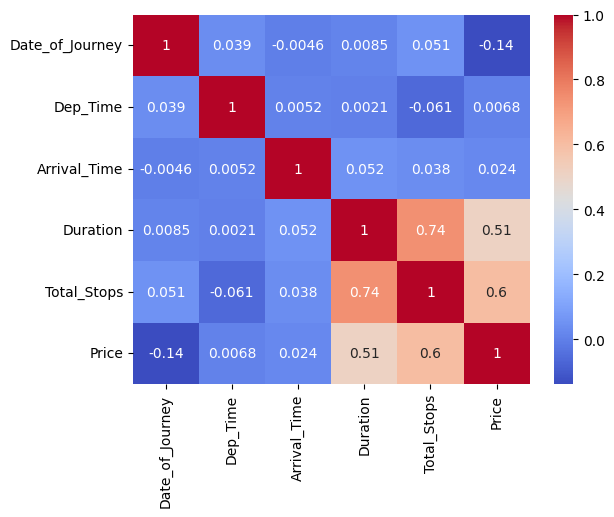

In [92]:
#Show correlation heatmap of all numerical variables
numeric_columns = df_flights.select_dtypes(include=['int32', 'int64', 'float64'])
corr_matrix = numeric_columns.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

The correlation heatmap shows that Duration, Total_Stops, and Price are all relatively strongly correlated with each other. This makes sense because flights with more stops usually take longer, and longer flights generally tend to be less expensive, since there is a higher demand for quicker and more convenient flights. Since Total_Stops and Duration are strongly correlated with each other, it would make sense to hypothesize that the optimal regression model will contain only one of these two variables, perhaps Total_Stops since it has a higher correlation coefficient with Price.

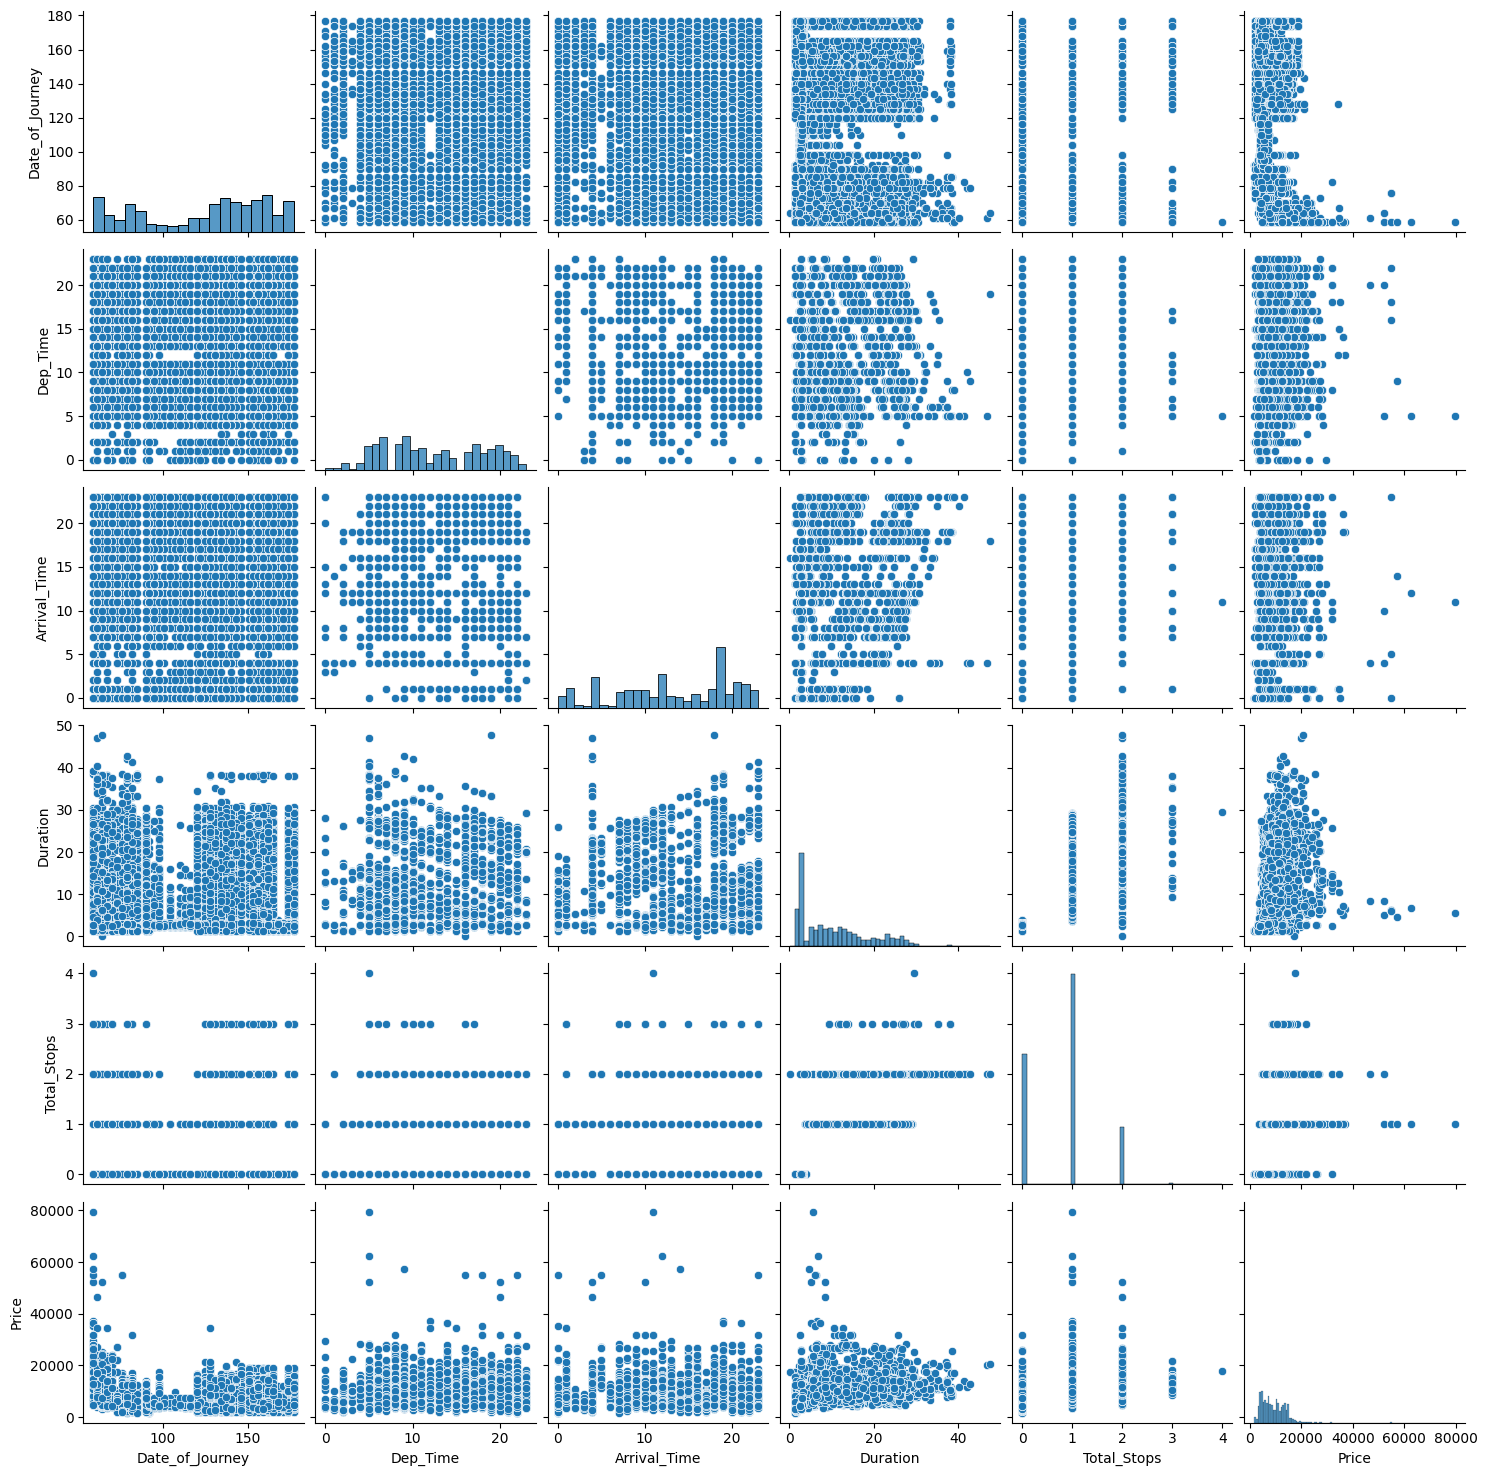

In [93]:
# Generate a pairplot
sns.pairplot(numeric_columns)
# Display the plot
plt.show()

The code above shows scatterplots between each numerical variable. The scatterplot between price and duration reveals that the relationship between these two variables is non-linear. This suggests that models that account for non-linearity may perform better when predicting price. There also seems to be a non-linear relationship between price and number of stops; the trend appears to be a curve that peaks at 1 and goes down on either side. With these two variables both having non-linear relationships with price, it is reasonable to hypothesize that non-linear regression models, such as decision tree models, may be optimal for predicting price.

In [94]:
#Add dummy variables to dataframe
df_flights = pd.concat([df_flights, dummy_df], axis=1)
df_flights.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,airports,AMD,ATQ,BBI,BDQ,BHO,BLR,BOM,CCU,COK,DED,DEL,GAU,GOI,GWL,HBX,HYD,IDR,IMF,ISK,IXA,IXB,IXC,IXR,IXU,IXZ,JAI,JDH,JLR,KNU,LKO,MAA,NAG,PAT,PNQ,RPR,STV,TRV,UDR,VGA,VNS,VTZ
0,IndiGo,82,Banglore,New Delhi,BLR → DEL,22,1,2.833333,0,No info,3897,"[BLR, DEL]",0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Air India,120,Kolkata,Banglore,CCU → IXR → BBI → BLR,5,13,7.416667,2,No info,7662,"[CCU, IXR, BBI, BLR]",0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Jet Airways,159,Delhi,Cochin,DEL → LKO → BOM → COK,9,4,19.000000,2,No info,13882,"[DEL, LKO, BOM, COK]",0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,IndiGo,131,Kolkata,Banglore,CCU → NAG → BLR,18,23,5.416667,1,No info,6218,"[CCU, NAG, BLR]",0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,IndiGo,59,Banglore,New Delhi,BLR → NAG → DEL,16,21,4.750000,1,No info,13302,"[BLR, NAG, DEL]",0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [95]:
#Show average Price for each airport

#Identify dummy columns
dummy_columns = [col for col in df_flights.columns if len(col) == 3]

# Initialize lists to store results
results = []

# Iterate through each dummy variable
for dummy in dummy_columns:
    # Filter rows where dummy variable equals 1
    filtered_rows = df_flights[df_flights[dummy] == 1]

    # Calculate average price and count of rows
    avg_price = filtered_rows['Price'].mean()
    row_count = len(filtered_rows)

    # Append results
    results.append({'Dummy Variable': dummy, 'Average Price': avg_price, 'Row Count': row_count})

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

results_df.sort_values(by='Average Price', ascending=False)

,Dummy Variable,Average Price,Row Count
9,DED,21064.666667,3
23,IXU,19381.333333,12
1,ATQ,16699.675000,40
26,JDH,16532.021277,47
13,GWL,16511.600000,10
39,VNS,15924.818182,11
4,BHO,14499.536232,69
37,UDR,14010.454545,22
16,IDR,13994.206612,121
27,JLR,13552.000000,1


The code above generates a dataframe that displays the average price for every time each airport is used on flights. It also displays the number of times each airport shows up in the dataframe, giving an idea of sample size for each airport. The highest average price is the Uttarakhand airport (DED), with an average price of ₹21,064.67 (Indian Rupee); this means that the average flight that passes through this airport will cost ₹21,064.67. However, the sample size for this airport is only 3, which means that this average price is unreliable for larger sample sizes. For airports that show up at least 100 times, the highest average price is the Indore airport (IDR), with an average price of ₹13,994.21. For airports that are either a source or a destination, the highest average price is the Mumbai airport, at ₹11,094.62, and the lowest average price is the Chennai airport, at ₹6,254.02. This variety in average airport price indicates that including these airport dummy variables will significantly help with predicting price.

In [96]:
dummy_columns

['AMD',
 'ATQ',
 'BBI',
 'BDQ',
 'BHO',
 'BLR',
 'BOM',
 'CCU',
 'COK',
 'DED',
 'DEL',
 'GAU',
 'GOI',
 'GWL',
 'HBX',
 'HYD',
 'IDR',
 'IMF',
 'ISK',
 'IXA',
 'IXB',
 'IXC',
 'IXR',
 'IXU',
 'IXZ',
 'JAI',
 'JDH',
 'JLR',
 'KNU',
 'LKO',
 'MAA',
 'NAG',
 'PAT',
 'PNQ',
 'RPR',
 'STV',
 'TRV',
 'UDR',
 'VGA',
 'VNS',
 'VTZ']

In [97]:
#Remove all dummy variables with less than 10 1s

# Identify 3-letter dummy variables (assume they are named like 'ABC', 'DEF', etc.)
dummy_columns = [col for col in df_flights.columns if len(col) == 3 and col.isalpha()]

# Count the number of 1s in each dummy variable
dummy_sums = df_flights[dummy_columns].sum()

# Select dummy variables with at least 10 1s
columns_to_keep = dummy_sums[dummy_sums >= 10].index

# Drop dummy variables with fewer than 10 1s
df_flights = df_flights.drop(columns=[col for col in dummy_columns if col not in columns_to_keep])

In [98]:
df_flights.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,airports,AMD,ATQ,BBI,BDQ,BHO,BLR,BOM,CCU,COK,DEL,GAU,GOI,GWL,HYD,IDR,IXB,IXC,IXR,IXU,JAI,JDH,KNU,LKO,MAA,NAG,PAT,PNQ,RPR,TRV,UDR,VGA,VNS
0,IndiGo,82,Banglore,New Delhi,BLR → DEL,22,1,2.833333,0,No info,3897,"[BLR, DEL]",0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Air India,120,Kolkata,Banglore,CCU → IXR → BBI → BLR,5,13,7.416667,2,No info,7662,"[CCU, IXR, BBI, BLR]",0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Jet Airways,159,Delhi,Cochin,DEL → LKO → BOM → COK,9,4,19.000000,2,No info,13882,"[DEL, LKO, BOM, COK]",0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,IndiGo,131,Kolkata,Banglore,CCU → NAG → BLR,18,23,5.416667,1,No info,6218,"[CCU, NAG, BLR]",0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,IndiGo,59,Banglore,New Delhi,BLR → NAG → DEL,16,21,4.750000,1,No info,13302,"[BLR, NAG, DEL]",0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [99]:
#Remove unnecessary columns
df_flights = df_flights.drop(['Route', 'airports'], axis=1)
df_flights.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,AMD,ATQ,BBI,BDQ,BHO,BLR,BOM,CCU,COK,DEL,GAU,GOI,GWL,HYD,IDR,IXB,IXC,IXR,IXU,JAI,JDH,KNU,LKO,MAA,NAG,PAT,PNQ,RPR,TRV,UDR,VGA,VNS
0,IndiGo,82,Banglore,New Delhi,22,1,2.833333,0,No info,3897,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Air India,120,Kolkata,Banglore,5,13,7.416667,2,No info,7662,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Jet Airways,159,Delhi,Cochin,9,4,19.000000,2,No info,13882,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,IndiGo,131,Kolkata,Banglore,18,23,5.416667,1,No info,6218,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,IndiGo,59,Banglore,New Delhi,16,21,4.750000,1,No info,13302,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


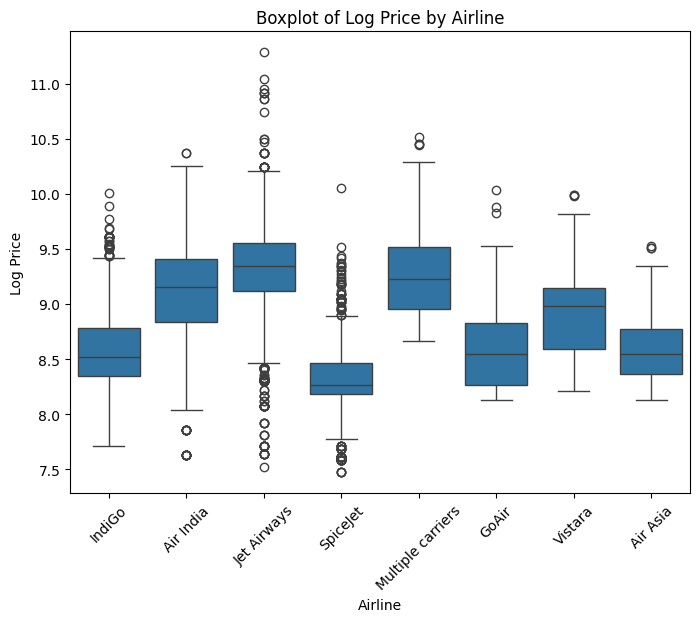

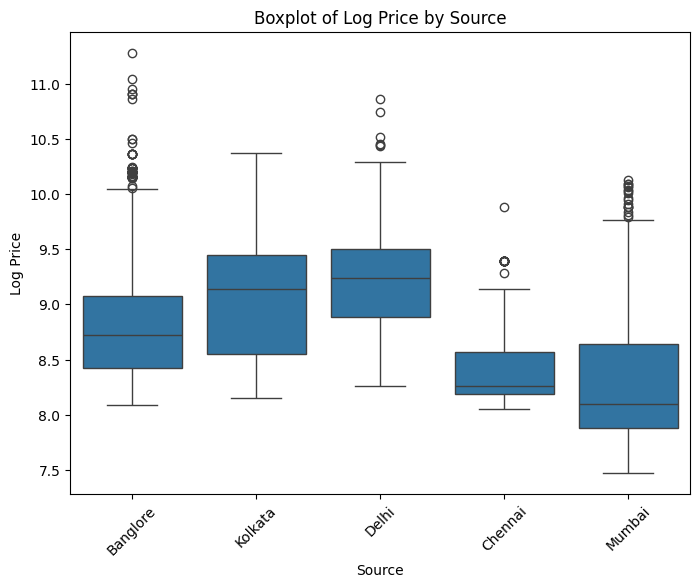

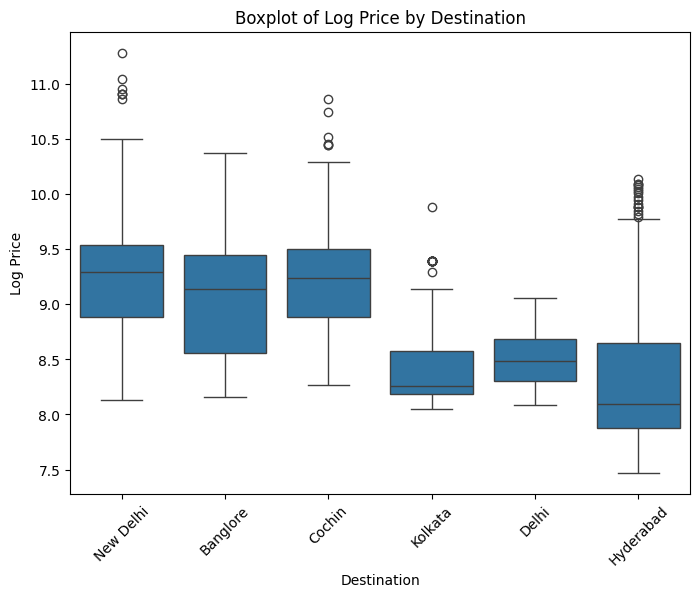

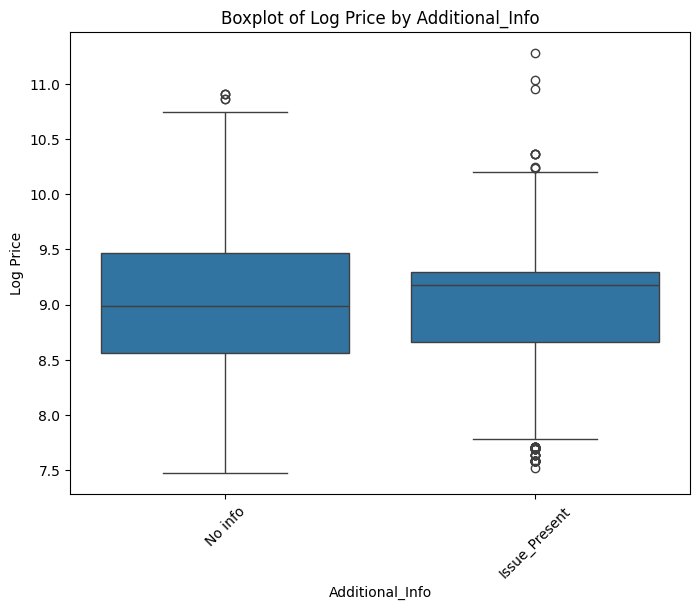

In [100]:
#Create a boxplot for each categorical variable for log Price (easier to compare categories with log since Price is right-skewed)

categorical_columns = df_flights.select_dtypes(include=['object']).columns

for category in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df_flights[category], y=np.log(df_flights['Price']))
    plt.title(f'Boxplot of Log Price by {category}')
    plt.xlabel(category)
    plt.ylabel('Log Price')
    plt.xticks(rotation=45)
    plt.show()

The code above generates boxplots showing Price for each category for each remaining categorical variable. Here are the most important insights:

* Airline: The airlines with the highest prices are Jet Airways and Air India. Flights with multiple carriers are also near the top when it comes to price. The airline with the lowest price is SpiceJet.

* Source: There is not a significant difference in airline price between each source location, but the highest prices appear to be from Delhi, while the cheapest sources are from Chennai and Mumbai. The fact that the Mumbai airport as a source is one of the cheapest sources is interesting considering the fact that the Mumbai airport overall is the most expensive airport out of all source/destination airports. This indicates that airports that start in Mumbai are significantly cheaper than airports that pass through Mumbai.

* Destination: The highest destination prices are New Delhi, Bangalore, and Cochin, while the lowest prices are Kolkata, Delhi, and Hyderabad. The Delhi and New Delhi destinations can be mapped from the Bangalore source, which has a relatively average price. This indicates that splitting the Bangalore source into two destinations adds valuable information for predicting price; this is further proof why the optimal model should contain Destination and not Source.

In [101]:
#View dataframe information
df_flights.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10681 entries, 0 to 10681
Data columns (total 42 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10681 non-null  object 
 1   Date_of_Journey  10681 non-null  int64  
 2   Source           10681 non-null  object 
 3   Destination      10681 non-null  object 
 4   Dep_Time         10681 non-null  int32  
 5   Arrival_Time     10681 non-null  int32  
 6   Duration         10681 non-null  float64
 7   Total_Stops      10681 non-null  int64  
 8   Additional_Info  10681 non-null  object 
 9   Price            10681 non-null  int64  
 10  AMD              10681 non-null  int64  
 11  ATQ              10681 non-null  int64  
 12  BBI              10681 non-null  int64  
 13  BDQ              10681 non-null  int64  
 14  BHO              10681 non-null  int64  
 15  BLR              10681 non-null  int64  
 16  BOM              10681 non-null  int64  
 17  CCU              

There are 4 object variables that still need to be converted to numerical variables.

In [102]:
#Remove Source variable
df_flights = df_flights.drop(['Source'], axis=1)
df_flights.head()

,Airline,Date_of_Journey,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,AMD,ATQ,BBI,BDQ,BHO,BLR,BOM,CCU,COK,DEL,GAU,GOI,GWL,HYD,IDR,IXB,IXC,IXR,IXU,JAI,JDH,KNU,LKO,MAA,NAG,PAT,PNQ,RPR,TRV,UDR,VGA,VNS
0,IndiGo,82,New Delhi,22,1,2.833333,0,No info,3897,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Air India,120,Banglore,5,13,7.416667,2,No info,7662,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Jet Airways,159,Cochin,9,4,19.000000,2,No info,13882,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,IndiGo,131,Banglore,18,23,5.416667,1,No info,6218,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,IndiGo,59,New Delhi,16,21,4.750000,1,No info,13302,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [103]:
#Convert all object variables to dummy variables

# Initialize an empty DataFrame to store dummy variables
df_dummies = pd.DataFrame()

# Process each object column
for column in df_flights.select_dtypes(include=['object']).columns:
    # Find the most common value
    most_common_value = df_flights[column].value_counts().idxmax()

    # Generate dummy variables for the column
    dummies = pd.get_dummies(df_flights[column], prefix=column, drop_first=False)

    # Drop the column for the most common value (base case)
    dummies = dummies.drop(f"{column}_{most_common_value}", axis=1)

    # Add the dummy variables to the final DataFrame
    df_dummies = pd.concat([df_dummies, dummies], axis=1)

# Combine the original DataFrame with the dummy variables
df_flights = pd.concat([df_flights, df_dummies], axis=1)

# Remove object variables
df_flights = df_flights.select_dtypes(exclude=['object'])

# Identify boolean columns
bool_columns = df_flights.select_dtypes(include=['bool']).columns

# Convert boolean columns to integers (0-1)
df_flights[bool_columns] = df_flights[bool_columns].astype(int)

df_flights.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10681 entries, 0 to 10681
Data columns (total 51 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date_of_Journey                10681 non-null  int64  
 1   Dep_Time                       10681 non-null  int32  
 2   Arrival_Time                   10681 non-null  int32  
 3   Duration                       10681 non-null  float64
 4   Total_Stops                    10681 non-null  int64  
 5   Price                          10681 non-null  int64  
 6   AMD                            10681 non-null  int64  
 7   ATQ                            10681 non-null  int64  
 8   BBI                            10681 non-null  int64  
 9   BDQ                            10681 non-null  int64  
 10  BHO                            10681 non-null  int64  
 11  BLR                            10681 non-null  int64  
 12  BOM                            10681 non-null  int6

## Part 2: Modeling

In [104]:
#Create X and y variables
X = df_flights.drop(['Price'], axis=1)
y = df_flights['Price']

In [105]:
#Split data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, shuffle=True)
X_train.shape, X_test.shape

((7476, 50), (3205, 50))

### Part 2.1: Simple Linear Regression

In [106]:
#Create function to compile model metrics

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def regression_metrics_to_dataframe(model_name, y_true, y_pred, metrics_df=None):
    """
    Computes regression metrics and stores them in a DataFrame.

    Parameters:
    - model_name (str): The name of the regression model.
    - y_true (array-like): Actual target values.
    - y_pred (array-like): Predicted target values.
    - metrics_df (pd.DataFrame, optional): Existing DataFrame to append results. Defaults to None.

    Returns:
    - pd.DataFrame: DataFrame containing regression metrics.
    """
    # Calculate metrics
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    # Create a dictionary of metrics
    metrics = {
        'Model': model_name,
        'Mean Squared Error': mse,
        'Mean Absolute Error': mae,
        'R-squared': r2
    }

    # Convert to a DataFrame
    metrics_row = pd.DataFrame([metrics])

    # Append to the existing DataFrame if provided
    if metrics_df is not None:
        metrics_df = pd.concat([metrics_df, metrics_row], ignore_index=True)
    else:
        metrics_df = metrics_row

    return metrics_df

In [107]:
#Fit simple linear regression model

from sklearn.linear_model import LinearRegression

#Initialize the Linear Regression model
model = LinearRegression()

#Fit the model to the training data
model.fit(X_train, y_train)

LinearRegression()

In [108]:
#Predict target values using the trained model
y_pred = model.predict(X_test)
y_pred

array([ 6031.83999348, 12801.18535622, 13277.9759823 , ...,
       14669.29875984, 10768.09281621, 14471.1810996 ])

In [109]:
#Generate model metrics
metrics_lr = regression_metrics_to_dataframe("Linear Regression", y_test, y_pred)
metrics_lr

,Model,Mean Squared Error,Mean Absolute Error,R-squared
0,Linear Regression,7.085865e+06,1730.050168,0.657357


The linear regression model's r-squared value is .657, which means that 65.7% of the variance in price can be explained by the rest of the data. However, since price is not a Normally distributed variable, and linear regression assumes normality, this model would not be ideal for further analysis. Furthermore, the linear regression model also assumes linear relationships between all variables, which, as shown in the scatterplots, is not true at all.

### Part 2.2: GLM

In [110]:
# Generate interaction terms

from itertools import combinations

import warnings

# Suppress warnings temporarily
with warnings.catch_warnings():
    warnings.simplefilter("ignore")

    interaction_terms = pd.DataFrame()
    for var1, var2 in combinations(X.columns, 2):
      interaction_terms[f'{var1}*{var2}'] = X[var1] * X[var2]

    # Combine original variables and interaction terms
    X_with_interactions = pd.concat([X, interaction_terms], axis=1)

    # Fit a linear regression model
    model = LinearRegression()
    model.fit(X_with_interactions, y)

    # Get coefficients of the interaction terms
    interaction_coefficients = {
      term: coef
      for term, coef in zip(X_with_interactions.columns, model.coef_)
      if '*' in term  # Only interaction terms
    }

    # Sort interaction terms by absolute importance
    sorted_interactions = sorted(interaction_coefficients.items(), key=lambda x: abs(x[1]), reverse=True)

    # Display the most important interaction
    print("Most important interaction term and its coefficient:", sorted_interactions[0])
    print("\nAll interactions sorted by importance:")
    for term, coef in sorted_interactions:
      print(f"{term}: {coef}")

Most important interaction term and its coefficient: ('IXB*Airline_SpiceJet', -83011.22113140144)

All interactions sorted by importance:
IXB*Airline_SpiceJet: -83011.22113140144
IXB*Airline_Air India: 64923.42939487854
DEL*IXB: 64923.42939487842
Total_Stops*IXB: 46835.637658362255
Duration*IXU: 46288.05625091073
Arrival_Time*IXB: 29474.084043423514
Dep_Time*IXB: -28535.932543428018
Dep_Time*IXU: -19816.431306268605
BLR*IXB: -18087.791736522322
CCU*IXB: -18087.791736522322
IXB*Destination_Banglore: -18087.791736522322
BOM*NAG: -14821.342993937356
Duration*IXB: -13684.793960882847
NAG*Airline_IndiGo: 13009.500931696914
DEL*GAU: 11806.81725253175
BLR*BOM: 11774.913404835912
AMD*BOM: 10834.453877707952
TRV*Airline_IndiGo: 9897.274957189731
Total_Stops*BHO: -9266.157518443935
Total_Stops*BLR: -9071.936355515556
Total_Stops*Airline_SpiceJet: -8852.028062586494
DEL*Destination_New Delhi: 8820.751961076843
BLR*Destination_New Delhi: 8820.751961072272
IDR*Airline_Multiple carriers: 8618.417770

The code above sorts all possible interactions between variables by importance; more important interactions will be more useful as interaction terms. The top 8 all include either IXB or IXU as an interaction variable, and since these represent airports with less than 100 entries, these terms can be ignored. The most important terms that fit the 100-sample criteria are Total_Stops and Airline_SpiceJet; this means that these should be the variables used to make a new interaction term in the improved GLM model.

In [111]:
#Add interaction terms to X
X_int = X.copy()
X_int['Total_Stops*Airline_SpiceJet'] = X_int['Total_Stops'] * X_int['Airline_SpiceJet']
X_int['MAA*Airline_SpiceJet'] = X_int['MAA'] * X_int['Airline_SpiceJet']
X_int.shape

(10681, 52)

In [112]:
#Split data again
X_int_train, X_int_test, y_train, y_test = train_test_split(X_int, y, test_size=0.30, random_state=1, shuffle=True)
X_int_train.shape, X_int_test.shape

((7476, 52), (3205, 52))

In [113]:
#Fit linear regression model with interaction term

#Initialize the Linear Regression model
model = LinearRegression()

#Fit the model to the training data
model.fit(X_int_train, y_train)

LinearRegression()

In [114]:
#Predict target values using the trained model
y_pred = model.predict(X_int_test)
y_pred

array([ 6010.06364335, 12815.83381545, 13316.38870756, ...,
       14725.65643396, 10768.26143169, 14533.17703166])

In [115]:
#Generate model metrics
metrics_glm = regression_metrics_to_dataframe("GLM (Interaction)", y_test, y_pred)
display(metrics_lr)
display(metrics_glm)

,Model,Mean Squared Error,Mean Absolute Error,R-squared
0,Linear Regression,7.085865e+06,1730.050168,0.657357


,Model,Mean Squared Error,Mean Absolute Error,R-squared
0,GLM (Interaction),7.062363e+06,1723.848338,0.658494


Adding an interaction term to the model did not improve the model, as the MSE increased and the r-squared value decreased. This indicates that none of the interaction terms are really that useful for predicting price.

### Part 2.3: Clustering

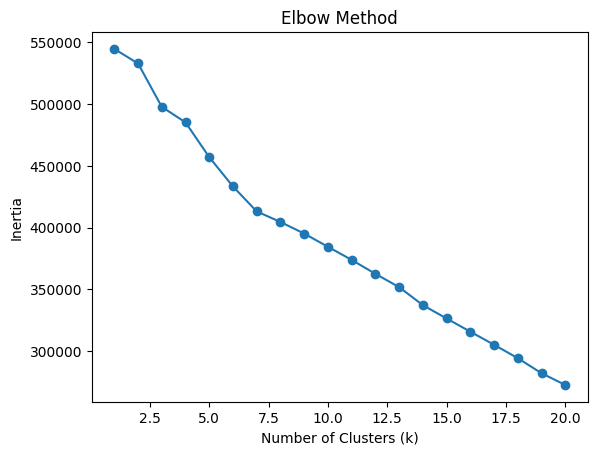

In [116]:
#Find optimal k value for k-means clustering

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_flights)

inertia = []
k_range = range(1, 21)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)  # Sum of squared distances to closest cluster center

# Plot the Elbow Curve
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

There does not seem to be a clear elbow point for determining number of clusters. Perhaps a silhouette score graph would perform better.

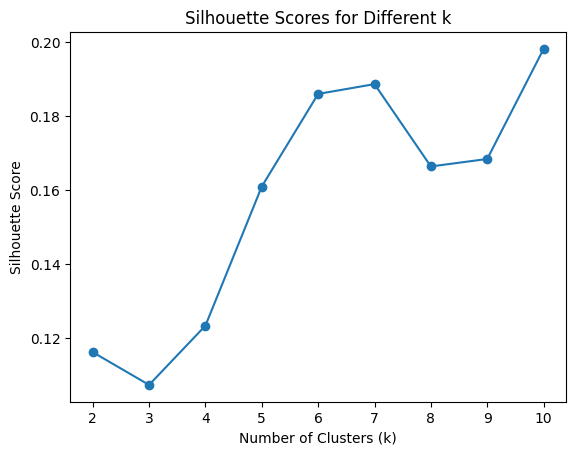

In [117]:
from sklearn.metrics import silhouette_score

# Test different values of k for silhouette score
silhouette_scores = []

for k in range(2, 11):  # Start from 2 clusters (silhouette score not defined for k=1)
    kmeans = KMeans(n_clusters=k, random_state=8)
    kmeans.fit(scaled_data)
    score = silhouette_score(scaled_data, kmeans.labels_)
    silhouette_scores.append(score)

# Plot silhouette scores
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

The highest silhouette score is 10, which indicates that the optimal number of clusters is 10.

In [118]:
# Fit K-Means with the chosen number of clusters
kmeans = KMeans(n_clusters=10, random_state=8)
kmeans.fit(scaled_data)

# Add cluster labels to the original dataset
df_flights['Cluster'] = kmeans.labels_

# Display the DataFrame with cluster labels
df_flights.head()

,Date_of_Journey,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,AMD,ATQ,BBI,BDQ,BHO,BLR,BOM,CCU,COK,DEL,GAU,GOI,GWL,HYD,IDR,IXB,IXC,IXR,IXU,JAI,JDH,KNU,LKO,MAA,NAG,PAT,PNQ,RPR,TRV,UDR,VGA,VNS,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Multiple carriers,Airline_SpiceJet,Airline_Vistara,Destination_Banglore,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Additional_Info_Issue_Present,Cluster
0,82,22,1,2.833333,0,3897,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,8
1,120,5,13,7.416667,2,7662,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,3
2,159,9,4,19.000000,2,13882,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,131,18,23,5.416667,1,6218,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,6
4,59,16,21,4.750000,1,13302,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,6


In [119]:
#Show value counts for each cluster
df_flights['Cluster'].value_counts()

,count
Cluster,
3,2837
0,2483
1,1805
2,1265
8,903
4,685
9,381
5,121
6,113


Not all of the clusters are evenly distributed; cluster 2 only has 40 points, while cluster 0 takes up nearly half of the entire dataset.

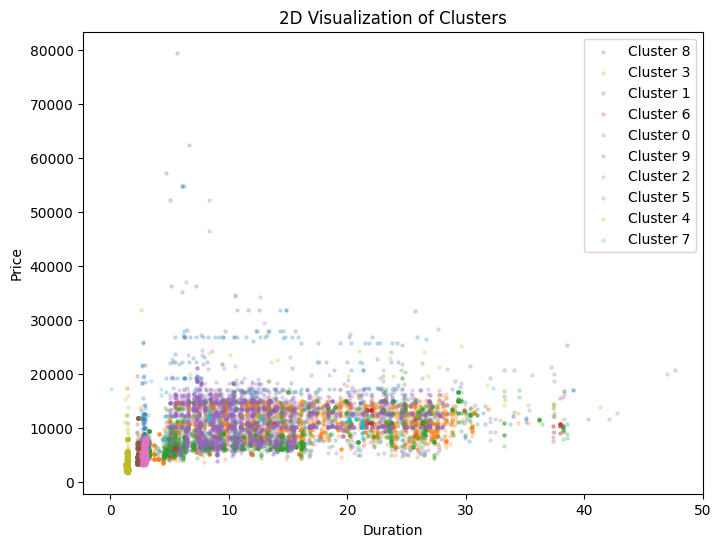

In [120]:
#Visualize clusters in 2D

# 2D Scatter Plot with Legend
plt.figure(figsize=(8, 6))

# Scatter plot for each cluster
for cluster in df_flights['Cluster'].unique():
    cluster_data = df_flights[df_flights['Cluster'] == cluster]
    plt.scatter(
        cluster_data['Duration'], cluster_data['Price'],
        label=f'Cluster {cluster}', s=5, alpha = .2
    )

# Customize the plot
plt.xlabel('Duration')
plt.ylabel('Price')
plt.title('2D Visualization of Clusters')
plt.legend()  # Add legend
plt.show()

When comparing Duration and Price (the only 2 continuous variables), there seem to be clear boundaries for some clusters. Here are some insights for each cluster:

* Cluster 4 has the shortest duration, followed by clusters 9 and 6.

* Clusters 1, 3, and 0 have relatively low prices and long durations.

* Cluster 8 has the highest prices; flights in this cluster are the most expensive.

In [121]:
#Display summary for each cluster
grouped_means = df_flights.groupby('Cluster').mean()

grouped_means

,Date_of_Journey,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,AMD,ATQ,BBI,BDQ,BHO,BLR,BOM,CCU,COK,DEL,GAU,GOI,GWL,HYD,IDR,IXB,IXC,IXR,IXU,JAI,JDH,KNU,LKO,MAA,NAG,PAT,PNQ,RPR,TRV,UDR,VGA,VNS,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Multiple carriers,Airline_SpiceJet,Airline_Vistara,Destination_Banglore,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Additional_Info_Issue_Present
Cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,133.275876,11.512686,13.314136,13.105685,1.149013,11630.944825,0.000000,0.01611,0.000000,0.011277,0.011679,0.000000,0.942408,0.000403,0.999597,1.000000,0.000000,0.0,0.000000,0.051953,0.0,0.000000,0.000000,0.000000,0.004833,0.097060,0.009666,0.000000,0.000000,0.003222,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.014499,0.019734,0.000000,0.472412,0.000000,0.000000,0.000000,0.0,0.000403,0.0,0.000000,0.327024
1,125.066482,11.911911,13.439889,13.298523,1.172853,8727.503601,0.127424,0.00000,0.002770,0.000000,0.011634,0.130748,0.464820,0.026039,1.000000,1.000000,0.000000,0.0,0.000000,0.186704,0.0,0.000000,0.007202,0.000000,0.000000,0.000000,0.007756,0.000000,0.032133,0.131302,0.000000,0.000000,0.023269,0.000000,0.011080,0.009972,0.000000,0.000000,0.044321,0.349030,0.014958,0.390582,0.008310,0.048199,0.024931,0.002216,0.0,0.000000,0.0,0.000000,0.034349
2,132.781818,12.639526,12.771542,2.861594,0.000000,5143.918577,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.056126,0.094862,0.054545,0.289328,0.000000,0.108300,0.104348,0.000000,1.0,0.000000,0.0,0.000000,0.193676
3,128.078604,13.981318,14.001762,12.416197,0.848784,9143.565738,0.014452,0.00000,0.038421,0.000000,0.000000,1.000000,0.382446,1.000000,0.023264,0.257667,0.029961,0.0,0.000000,0.021854,0.0,0.007402,0.000000,0.019034,0.000000,0.006697,0.000000,0.003525,0.000000,0.023264,0.000000,0.003525,0.008107,0.000000,0.000705,0.000000,0.000000,0.003525,0.052873,0.172013,0.008812,0.153331,0.000000,0.105746,0.064505,1.000000,0.0,0.000000,0.0,0.000000,0.262249
4,118.970803,12.097810,12.400000,3.049027,0.127007,4890.769343,0.005839,0.00000,0.002920,0.002920,0.010219,0.005839,1.000000,0.002920,0.001460,0.071533,0.000000,0.0,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.001460,0.004380,0.000000,0.000000,0.005839,0.000000,0.000000,0.000000,0.000000,0.000000,0.001460,0.000000,0.001460,0.000000,0.185401,0.000000,0.284672,0.000000,0.178102,0.033577,0.000000,0.0,1.000000,0.0,0.000000,0.224818
5,127.884298,10.834711,11.669421,20.409780,2.041322,13994.206612,0.000000,0.00000,0.000000,0.000000,0.000000,0.099174,0.958678,0.000000,0.884298,1.000000,0.000000,0.0,0.082645,0.016529,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.066116,0.000000,0.041322,0.173554,0.000000,0.000000,0.000000,0.0,0.016529,0.0,0.099174,0.239669
6,139.557522,10.300885,11.115044,21.748525,2.053097,11710.823009,0.000000,0.00000,0.000000,0.000000,0.000000,0.212389,0.884956,0.088496,0.778761,0.902655,0.000000,0.0,0.000000,0.017699,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.982301,0.000000,0.000000,0.168142,0.000000,0.000000,0.000000,0.000000,0.000000,0.345133,0.000000,0.115044,0.000000,0.000000,0.000000,0.088496,0.0,0.008850,0.0,0.123894,0.194690
7,128.840909,16.340909,14.818182,16.688447,1.909091,11708.534091,0.000000,0.00000,0.000000,0.000000,0.000000,0.261364,0.920455,0.181818,0.659091,0.738636,0.000000,1.0,0.000000,0.079545,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.068182,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.9

Since cluster 8 has the highest price, it would make sense to look at data for cluster 8. This cluster, along with having the highest price, also has the following characteristics:

* Earliest flight dates

* Most likely to contain BHO, LKO, and VGA airports

* Most likely to have the destination of New Delhi

### Part 2.4: PCA

In [122]:
#Transform X using PCA

from sklearn.decomposition import PCA

# Standardize the features
scaler = StandardScaler()
X = X.reset_index(drop=True)
X_scaled = scaler.fit_transform(X)

# Apply PCA to explain 90% of the variance
pca = PCA(n_components=0.90)  # Automatically selects the number of components to explain 90% of the variance
X_pca = pca.fit_transform(X_scaled)

print("Number of Components:", pca.n_components_)

Number of Components: 35


In [123]:
# Add PCA-transformed features to the DataFrame
result_df = df_flights.copy()
result_df['PCA1'] = X_pca[:, 0]
result_df['PCA2'] = X_pca[:, 1]
result_df.head()

,Date_of_Journey,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,AMD,ATQ,BBI,BDQ,BHO,BLR,BOM,CCU,COK,DEL,GAU,GOI,GWL,HYD,IDR,IXB,IXC,IXR,IXU,JAI,JDH,KNU,LKO,MAA,NAG,PAT,PNQ,RPR,TRV,UDR,VGA,VNS,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Multiple carriers,Airline_SpiceJet,Airline_Vistara,Destination_Banglore,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Additional_Info_Issue_Present,Cluster,PCA1,PCA2
0,82,22,1,2.833333,0,3897,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,8,-1.468576,-1.564171
1,120,5,13,7.416667,2,7662,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,3,-2.340224,5.309065
2,159,9,4,19.000000,2,13882,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3.189361,0.552763
3,131,18,23,5.416667,1,6218,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,6,-2.089653,1.775567
4,59,16,21,4.750000,1,13302,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,6,-0.205427,-0.214552


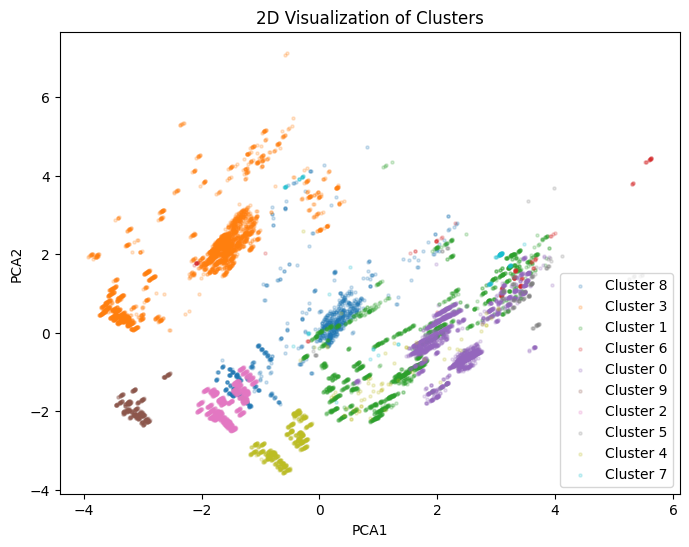

In [124]:
#Visualize clusters
# 2D Scatter Plot with Legend
plt.figure(figsize=(8, 6))

# Scatter plot for each cluster
for cluster in result_df['Cluster'].unique():
    cluster_data = result_df[result_df['Cluster'] == cluster]
    plt.scatter(
        cluster_data['PCA1'], cluster_data['PCA2'],
        label=f'Cluster {cluster}', s=5, alpha = .2
    )

# Customize the plot
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('2D Visualization of Clusters')
plt.legend()  # Add legend
plt.show()

The first two components of PCA show clear boundaries between most clusters. Even so, some clusters overlap, such as clusters 0 and 2, and some clusters appear in separate parts of the graph, such as cluster 3. Since only one variable, Duration, in the original data is continuous, this causes the formation of parallel "streaks" of points; the direction of these "streaks" is partially determined by the relationship between Duration and the principal components.

In [125]:
#Split PCA data
X_pca_train, X_pca_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.30, random_state=1, shuffle=True)
X_pca_train.shape, X_pca_test.shape

((7476, 35), (3205, 35))

In [126]:
#Fit linear regression model on PCA data

#Initialize the Linear Regression model
model = LinearRegression()

#Fit the model to the training data
model.fit(X_pca_train, y_train)

LinearRegression()

In [127]:
#Predict target values using the trained model
y_pred = model.predict(X_pca_test)
y_pred

array([ 5504.85852656, 10415.81843322,  9794.16009167, ...,
       12450.35090298, 12145.93791835, 10910.23724624])

In [128]:
#Generate model metrics
metrics_pca = regression_metrics_to_dataframe("Full PCA Data", y_test, y_pred)
display(metrics_lr)
display(metrics_glm)
display(metrics_pca)

,Model,Mean Squared Error,Mean Absolute Error,R-squared
0,Linear Regression,7.085865e+06,1730.050168,0.657357


,Model,Mean Squared Error,Mean Absolute Error,R-squared
0,GLM (Interaction),7.062363e+06,1723.848338,0.658494


,Model,Mean Squared Error,Mean Absolute Error,R-squared
0,Full PCA Data,1.002372e+07,2234.170294,0.515295


The model with full PCA data performs much worse than the models on the original data. This suggests that transforming the full data using PCA does not improve the model.

In [129]:
#Add interaction terms to X
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df = X_scaled_df.reset_index(drop=True)
result_df = result_df.reset_index(drop=True)
X_comb = pd.concat([pd.DataFrame(X_scaled, columns=X.columns), result_df[["PCA1", "PCA2"]]], axis=1)
X_comb.shape

(10681, 52)

In [130]:
#Split combined data
X_comb_scaled = scaler.fit_transform(X_comb)
X_comb_train, X_comb_test, y_train, y_test = train_test_split(X_comb_scaled, y, test_size=0.30, random_state=1, shuffle=True)
X_comb_train.shape, X_comb_test.shape, y_train.shape, y_test.shape

((7476, 52), (3205, 52), (7476,), (3205,))

In [131]:
#Fit linear regression model on combined data

#Initialize the Linear Regression model
model = LinearRegression()

#Fit the model to the training data
model.fit(X_comb_train, y_train)

LinearRegression()

In [132]:
#Predict target values using the trained model
y_pred = model.predict(X_comb_test)
y_pred

array([ 6031.32103382, 12800.57103382, 13277.82103382, ...,
       14670.00853382, 10768.63353382, 14471.13353382])

In [133]:
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

R-squared: 0.657354963424071


In [134]:
#Generate model metrics
metrics_comb = regression_metrics_to_dataframe("Combined PCA and Original", y_test, y_pred)
display(metrics_lr)
display(metrics_glm)
display(metrics_pca)
display(metrics_comb)

,Model,Mean Squared Error,Mean Absolute Error,R-squared
0,Linear Regression,7.085865e+06,1730.050168,0.657357


,Model,Mean Squared Error,Mean Absolute Error,R-squared
0,GLM (Interaction),7.062363e+06,1723.848338,0.658494


,Model,Mean Squared Error,Mean Absolute Error,R-squared
0,Full PCA Data,1.002372e+07,2234.170294,0.515295


,Model,Mean Squared Error,Mean Absolute Error,R-squared
0,Combined PCA and Original,7.085915e+06,1730.035246,0.657355


When adding the first two PCA components to the scaled X data, the resulting model is not much different from the original linear regression model. The results are basically the same between the two models; this suggests that the two components do not affect the model to a high degree.

### Part 2.5: Lasso Regression

In [135]:
#Perform grid search to find optimal parameters
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    # Define the Lasso model
    lasso = Lasso()

    # Define the parameter grid for alpha
    param_grid = {'alpha': [0.01, 0.1, 1, 10, 100, 1000]}

    # Set up the GridSearchCV
    grid_search = GridSearchCV(estimator=lasso, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

    # Fit the grid search to the training data
    grid_search.fit(X_train, y_train)

    # Get the best parameters and the corresponding score
    best_alpha = grid_search.best_params_['alpha']
    best_score = grid_search.best_score_
    print(f"Best alpha: {best_alpha}")
    print(f"Best score (negative MSE): {best_score}")

Best alpha: 0.1
Best score (negative MSE): -7757028.00613079


In [136]:
# Train the Lasso model with the best alpha on the full training data
best_lasso = Lasso(alpha=best_alpha)
best_lasso.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.024e+09, tolerance: 1.608e+07
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.1)

In [137]:
# Evaluate the model on the test set
y_pred = best_lasso.predict(X_test)

#Generate model metrics
metrics_lasso = regression_metrics_to_dataframe("Lasso", y_test, y_pred)
display(metrics_lr)
display(metrics_lasso)

,Model,Mean Squared Error,Mean Absolute Error,R-squared
0,Linear Regression,7.085865e+06,1730.050168,0.657357


,Model,Mean Squared Error,Mean Absolute Error,R-squared
0,Lasso,7.079824e+06,1729.009507,0.657649


Lasso regression with an alpha value of 0.1 only marginally improves the model metrics; this suggests that the optimal linear model is only a slight modification of the base linear regression model. Even so, this model still assumes linear relationships between variables, so this may not be the optimal model for this data, which has multiple non-linear relationships.

### Part 2.6: Ridge Regression

In [138]:
from sklearn.linear_model import Ridge

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    # Define the Ridge model
    ridge = Ridge()

    # Define the parameter grid for alpha
    param_grid = {'alpha': [0.01, 0.1, 1, 10, 100, 1000]}

    # Set up the GridSearchCV
    grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

    # Fit the grid search to the training data
    grid_search.fit(X_train, y_train)

    # Get the best parameters and the corresponding score
    best_alpha = grid_search.best_params_['alpha']
    best_score = grid_search.best_score_
    print(f"Best alpha: {best_alpha}")
    print(f"Best score (negative MSE): {best_score}")

Best alpha: 1
Best score (negative MSE): -7757310.155221388


In [139]:
# Train the Ridge model with the best alpha on the full training data
best_ridge = Ridge(alpha=best_alpha)
best_ridge.fit(X_train, y_train)

Ridge(alpha=1)

In [140]:
# Evaluate the model on the test set
y_pred = best_ridge.predict(X_test)

#Generate model metrics
metrics_ridge = regression_metrics_to_dataframe("Ridge", y_test, y_pred)
display(metrics_lr)
display(metrics_lasso)
display(metrics_ridge)

,Model,Mean Squared Error,Mean Absolute Error,R-squared
0,Linear Regression,7.085865e+06,1730.050168,0.657357


,Model,Mean Squared Error,Mean Absolute Error,R-squared
0,Lasso,7.079824e+06,1729.009507,0.657649


,Model,Mean Squared Error,Mean Absolute Error,R-squared
0,Ridge,7.070272e+06,1727.839166,0.658111


The ridge regression model performs better than both the original linear regression and lasso regression models. Again, ridge regression has the same assumptions of linearity, so there may still be better models out there.

### Part 2.7: Transformed y Variable

Since Price is extremely right-skewed, it may be a good idea to perform a log-transformation of Price before fitting models.

In [141]:
#Log-transform y variable
y_log = np.log(y)

In [142]:
#Split data with log-transformed y variable
X_train, X_test, y_log_train, y_log_test = train_test_split(X, y_log, test_size=0.30, random_state=1, shuffle=True)
X_train.shape, X_test.shape

((7476, 50), (3205, 50))

In [143]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    # Define the Ridge model
    ridge = Ridge()

    # Define the parameter grid for alpha
    param_grid = {'alpha': [0.01, 0.1, 1, 10, 100, 1000]}

    # Set up the GridSearchCV
    grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

    # Fit the grid search to the training data
    grid_search.fit(X_train, y_log_train)

    # Get the best parameters and the corresponding score
    best_alpha = grid_search.best_params_['alpha']
    best_score = grid_search.best_score_
    print(f"Best alpha: {best_alpha}")
    print(f"Best score (negative MSE): {best_score}")

Best alpha: 1
Best score (negative MSE): -0.058504725791678515


In [144]:
# Train the Ridge model with the best alpha on the full training data
best_ridge = Ridge(alpha=best_alpha)
best_ridge.fit(X_train, y_log_train)

Ridge(alpha=1)

In [145]:
# Evaluate the model on the test set
y_pred = best_ridge.predict(X_test)

#Generate model metrics
metrics_ridge_log = regression_metrics_to_dataframe("Ridge (Log y)", y_log_test, y_pred)
display(metrics_lr)
display(metrics_lasso)
display(metrics_ridge)
display(metrics_ridge_log)

,Model,Mean Squared Error,Mean Absolute Error,R-squared
0,Linear Regression,7.085865e+06,1730.050168,0.657357


,Model,Mean Squared Error,Mean Absolute Error,R-squared
0,Lasso,7.079824e+06,1729.009507,0.657649


,Model,Mean Squared Error,Mean Absolute Error,R-squared
0,Ridge,7.070272e+06,1727.839166,0.658111


,Model,Mean Squared Error,Mean Absolute Error,R-squared
0,Ridge (Log y),0.057079,0.17644,0.779351


The MSE and MAE values for the ridge regression model with log-transformed y are misleading, since the scale of y is significantly reduced. However, the r-squared value significantly increases from .658 to .779 by transforming the y variable; this may be something to do in subsequent models.

### Part 2.8: Full Decision Tree Model

In [146]:
#Fit full tree on log-transformed y

from sklearn.tree import DecisionTreeRegressor

reg = DecisionTreeRegressor(max_depth=None, random_state=8)
reg.fit(X_train, y_log_train)

DecisionTreeRegressor(random_state=8)

In [147]:
#Predict log(y) values
y_pred = reg.predict(X_test)
y_pred

array([8.6845703 , 9.55754057, 9.60109785, ..., 9.62436871, 9.15302901,
       9.39532505])

In [148]:
#Generate model metrics
metrics_dt_log = regression_metrics_to_dataframe("Decision Tree", y_log_test, y_pred)
display(metrics_ridge_log)
display(metrics_dt_log)

,Model,Mean Squared Error,Mean Absolute Error,R-squared
0,Ridge (Log y),0.057079,0.17644,0.779351


,Model,Mean Squared Error,Mean Absolute Error,R-squared
0,Decision Tree,0.021423,0.068779,0.917184


All of the metrics for the decision tree model are better than the ridge regression model metrics. This is to be expected, as the relationships between many of the variables in the data are non-linear. Decision tree models, unlike linear regression-derivative models (including ridge regression), account for non-linearity in the data, so it would make sense that a decision tree model would perform better than ridge regression with non-linear data. Furthermore, this is the untuned full decision tree model; the metrics have the potential to further improve.

### Part 2.9: Pre-Pruned Decision Tree Model

In [149]:
#Set up parameter grid
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

In [150]:
#Perform grid search

#Instantiate the model
reg = DecisionTreeRegressor(random_state=8)

#Set up GridSearchCV
grid_search = GridSearchCV(estimator=reg, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=-1)

#Fit the grid search to the training data
grid_search.fit(X_train, y_log_train)

#Best parameters and score
print("Best Parameters:", grid_search.best_params_)

#Final model
pre_pruned = grid_search.best_estimator_

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [151]:
#Get predictions for log(y)
y_pred = pre_pruned.predict(X_test)
y_pred

array([8.67397724, 9.53761674, 9.60109785, ..., 9.62436871, 9.16182701,
       9.39965077])

In [152]:
#Generate model metrics
metrics_dt_prepruned_log = regression_metrics_to_dataframe("Pre-Pruned Decision Tree", y_log_test, y_pred)
display(metrics_dt_log)
display(metrics_dt_prepruned_log)

,Model,Mean Squared Error,Mean Absolute Error,R-squared
0,Decision Tree,0.021423,0.068779,0.917184


,Model,Mean Squared Error,Mean Absolute Error,R-squared
0,Pre-Pruned Decision Tree,0.018747,0.074137,0.927529


The pre-pruned decision tree with optimal parameters performs better than the full decision tree in all metrics. This suggests that setting limits on the tree's growth improves the overall performance.

### Part 2.10: Post-Pruned Decision Tree Model

In [153]:
#Extract alphas
path = reg.cost_complexity_pruning_path(X_train, y_log_train)
ccp_alphas = path.ccp_alphas
sampled_alphas = np.linspace(ccp_alphas.min(), ccp_alphas.max(), num=100)

In [154]:
#Perform grid search on alphas

reg = DecisionTreeRegressor(random_state=8)
grid_search = GridSearchCV(estimator=reg, param_grid={'ccp_alpha': sampled_alphas},
                           scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=-1)

grid_search.fit(X_train, y_log_train)

print("Best alpha:", grid_search.best_params_)
print("Best score:", -grid_search.best_score_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
5 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_p

Best alpha: {'ccp_alpha': 0.0014695905547449115}
Best score: 0.057071704798067745


In [155]:
#Final model
best_reg = grid_search.best_estimator_

#Get predictions for log(y)
y_pred = best_reg.predict(X_test)
y_pred

array([8.48028418, 9.33781121, 9.56152472, ..., 9.56152472, 9.29884938,
       9.56152472])

In [156]:
#Generate model metrics
metrics_dt_postpruned_log = regression_metrics_to_dataframe("Post-Pruned Decision Tree", y_log_test, y_pred)
display(metrics_dt_log)
display(metrics_dt_prepruned_log)
display(metrics_dt_postpruned_log)

,Model,Mean Squared Error,Mean Absolute Error,R-squared
0,Decision Tree,0.021423,0.068779,0.917184


,Model,Mean Squared Error,Mean Absolute Error,R-squared
0,Pre-Pruned Decision Tree,0.018747,0.074137,0.927529


,Model,Mean Squared Error,Mean Absolute Error,R-squared
0,Post-Pruned Decision Tree,0.057068,0.174401,0.779392


The post-pruned decision tree performs much worse than the full tree, which indicates that pruning the decision tree after its full growth negatively impacts its performance.

### Part 2.11: Random Forest

In [157]:
#Set up parameter grid

from sklearn.ensemble import RandomForestRegressor

from scipy.stats import randint

param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(10, 40),
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5)
}

In [158]:
type(param_dist)

dict

In [159]:
#Perform randomized grid search (full grid search takes too long)

from sklearn.model_selection import RandomizedSearchCV

# Perform randomized search with fixed seed
random_search = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=8),
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=8  # Ensure reproducibility
)

random_search.fit(X_train[:1000], y_log_train[:1000])

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=8),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7dcb3450a320>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7dcb34508b80>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7dcb345088b0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7dcb33e306d0>},
                   random_state=8, verbose=1)

In [160]:
#Best parameters and score
print("Best Parameters:", random_search.best_params_)
print("Best Cross-Validation Score:", random_search.best_score_)

#Final model
best_rf_reg = random_search.best_estimator_

Best Parameters: {'max_depth': 38, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 491}
Best Cross-Validation Score: 0.8616731214658596


In [161]:
#Get predictions for log(y)
y_pred = best_rf_reg.predict(X_test)
y_pred

array([8.55426039, 9.45594267, 9.58605001, ..., 9.52545909, 9.313109  ,
       9.28134914])

In [162]:
#Generate model metrics
metrics_rf_log = regression_metrics_to_dataframe("Random Forest", y_log_test, y_pred)
display(metrics_dt_prepruned_log)
display(metrics_rf_log)

,Model,Mean Squared Error,Mean Absolute Error,R-squared
0,Pre-Pruned Decision Tree,0.018747,0.074137,0.927529


,Model,Mean Squared Error,Mean Absolute Error,R-squared
0,Random Forest,0.030975,0.117614,0.880261


The random forest model performs well, with an r-squared score of .88, but not as well as the pre-pruned decision tree. Since random forests are more complex than decision trees, this indicates that the random forest model may be overfitting to the data.

### Part 2.12: XGBoost Model

In [163]:
#Set up parameter grid

param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(10, 40),
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5)
}

In [164]:
# Instantiate the XGBoost regressor

from xgboost import XGBRegressor

# Perform randomized search with fixed seed
random_search = RandomizedSearchCV(
    estimator=XGBRegressor(random_state=8),
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=8  # Ensure reproducibility
)

random_search.fit(X_train[:1000], y_log_train[:1000])

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:41:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7dcb33e2abf0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7dcb33e2b3a0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7dcb33e29e70>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7dcb33e2b3d0>},
                   random_state=8, verbose=1)

In [165]:
#Best parameters and score
print("Best Parameters:", random_search.best_params_)
print("Best Cross-Validation Score:", random_search.best_score_)

#Final model
best_xgb_reg = random_search.best_estimator_

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 107}
Best Cross-Validation Score: 0.8508282420425204


In [166]:
#Get predictions for log(y)
y_pred = best_xgb_reg.predict(X_test)
y_pred

array([8.5854025, 9.474577 , 9.5908375, ..., 9.567177 , 9.352508 ,
       9.269158 ], dtype=float32)

In [167]:
#Generate model metrics
metrics_xgb_log = regression_metrics_to_dataframe("XGBoost", y_log_test, y_pred)
display(metrics_dt_prepruned_log)
display(metrics_rf_log)
display(metrics_xgb_log)

,Model,Mean Squared Error,Mean Absolute Error,R-squared
0,Pre-Pruned Decision Tree,0.018747,0.074137,0.927529


,Model,Mean Squared Error,Mean Absolute Error,R-squared
0,Random Forest,0.030975,0.117614,0.880261


,Model,Mean Squared Error,Mean Absolute Error,R-squared
0,XGBoost,0.034164,0.12132,0.867933


The random forest and XGBoost models, which represent bagging and boosting techniques respectively, do not perform as well as the simpler pre-pruned decision tree model. This suggests that, while the data is non-linear, it does not have a lot of noise and is relatively simple to predict. This means that bagging and boosting techniques may overfit to the training data, causing the test scores to suffer.

### Part 2.13: Neural Networks

In [168]:
pip install scikeras

In [169]:
#Import required libaries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from scikeras.wrappers import KerasRegressor

In [170]:
#Create model
def create_model(optimizer='adam', learning_rate=0.01, hidden_units=32, activation='relu'):
    model = Sequential()
    model.add(Dense(hidden_units, input_dim=X_train.shape[1], activation=activation))
    model.add(Dense(hidden_units, activation=activation))
    model.add(Dense(1, activation='linear'))  # Output layer for regression
    optimizer_instance = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer_instance, loss='mse', metrics=['mae'])
    return model

In [171]:
#Wrap model
model = KerasRegressor(model=create_model, verbose=0)

In [172]:
#Define parameter grid

from scipy.stats import uniform

param_distributions = {
    'model__hidden_units': randint(32, 128),       # Random integers for hidden units
    'model__activation': ['relu', 'tanh'],        # Choose randomly from list
    'model__learning_rate': uniform(0.001, 0.1),  # Uniform distribution for learning rate
    'batch_size': randint(16, 64),                # Random integers for batch size
    'epochs': [10]
}

In [173]:
from tensorflow.keras.callbacks import EarlyStopping

random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_distributions,
    n_iter=20,  # Number of random combinations to sample
    scoring='neg_mean_squared_error',
    cv=3,  # 3-fold cross-validation
    verbose=1,
    n_jobs=-1,
    random_state=8
)

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
random_search.fit(X_train[:1000], y_log_train[:1000], validation_split=0.2, callbacks=[early_stopping])

# Best parameters and score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", -random_search.best_score_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Best Parameters: {'batch_size': 25, 'epochs': 10, 'model__activation': 'tanh', 'model__hidden_units': 113, 'model__learning_rate': 0.008094284475019874}
Best Score: 0.1224563163587357


In [174]:
#Final model
best_nn_reg = random_search.best_estimator_

#Get predictions for log(y)
y_pred = best_nn_reg.predict(X_test)
y_pred

array([8.503342, 9.318673, 9.196055, ..., 9.315274, 9.29679 , 9.223052],
      dtype=float32)

In [175]:
#Generate model metrics
metrics_nn_log = regression_metrics_to_dataframe("Neural Network", y_log_test, y_pred)
display(metrics_dt_prepruned_log)
display(metrics_nn_log)

,Model,Mean Squared Error,Mean Absolute Error,R-squared
0,Pre-Pruned Decision Tree,0.018747,0.074137,0.927529


,Model,Mean Squared Error,Mean Absolute Error,R-squared
0,Neural Network,0.105325,0.259865,0.592846


According to the model metrics, the neural network model does not perform as well as the reigning top model, the pre-pruned decision tree model. Since this is the final model to be tested, the pre-pruned decision tree model is the optimal model for predicting flight price.

In [176]:
#Full results data frame
results_df = pd.concat([metrics_lr, metrics_glm, metrics_pca, metrics_comb, metrics_lasso, metrics_ridge, metrics_ridge_log,
                       metrics_dt_log, metrics_dt_prepruned_log, metrics_dt_postpruned_log, metrics_rf_log,
                       metrics_xgb_log, metrics_nn_log])
display(results_df)

,Model,Mean Squared Error,Mean Absolute Error,R-squared
0,Linear Regression,7.085865e+06,1730.050168,0.657357
0,GLM (Interaction),7.062363e+06,1723.848338,0.658494
0,Full PCA Data,1.002372e+07,2234.170294,0.515295
0,Combined PCA and Original,7.085915e+06,1730.035246,0.657355
0,Lasso,7.079824e+06,1729.009507,0.657649
0,Ridge,7.070272e+06,1727.839166,0.658111
0,Ridge (Log y),5.707871e-02,0.176440,0.779351
0,Decision Tree,2.142327e-02,0.068779,0.917184
0,Pre-Pruned Decision Tree,1.874732e-02,0.074137,0.927529
0,Post-Pruned Decision Tree,5.706818e-02,0.174401,0.779392


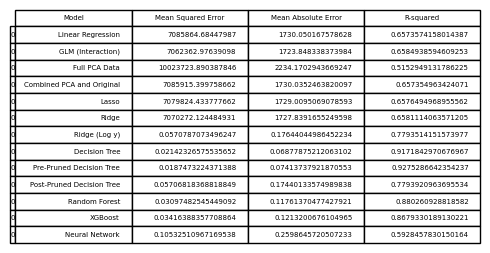

In [177]:
from pandas.plotting import table

# Create a Matplotlib figure
fig, ax = plt.subplots(figsize=(6, 2))  # Adjust size as needed
ax.axis('tight')
ax.axis('off')

# Create a table plot
table(ax, results_df, loc='center')

# Save as an image
plt.savefig("dataframe_image.png", dpi=300, bbox_inches='tight')
plt.show()

### Part 2.14: Feature Importances

In [178]:
#Get feature importances from pre-pruned model
importances = pre_pruned.feature_importances_

In [179]:
#Combine feature importances with feature names
feature_names = X_train.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df_top_10 = importance_df.head(10)

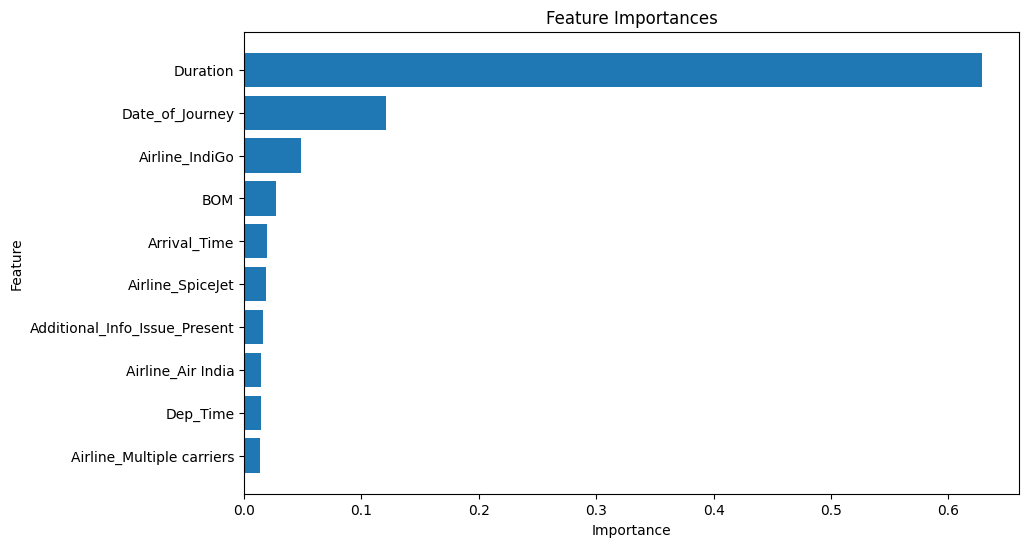

In [180]:
#Visualize feature importances

plt.figure(figsize=(10, 6))
plt.barh(importance_df_top_10['Feature'], importance_df_top_10['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature at the top
plt.show()

The code above generates a barplot showing the top 10 most important features in the pre-pruned decision tree model. The most important feature is Duration, which has a non-linear relationship with Price.

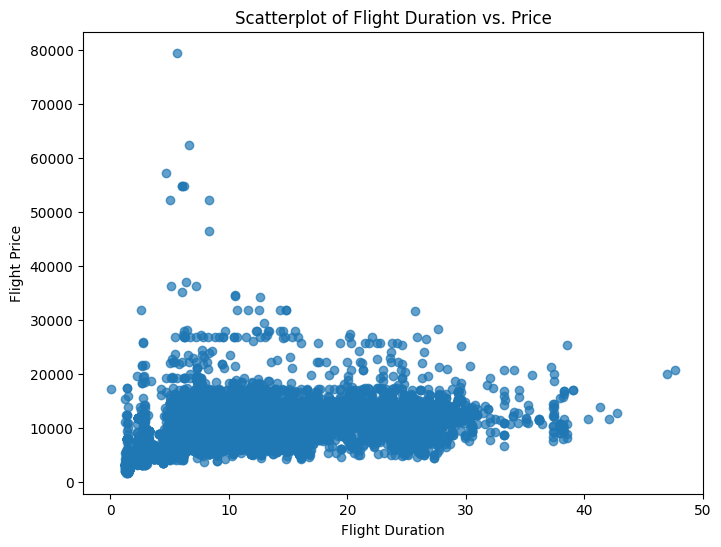

In [181]:
#Create scatterplot
plt.figure(figsize=(8, 6))
plt.scatter(df_flights["Duration"], df_flights["Price"], alpha=0.7)
plt.xlabel('Flight Duration')
plt.ylabel('Flight Price')
plt.title('Scatterplot of Flight Duration vs. Price')
plt.show()

According to the scatterplot between duration and price, there appears to be a "sweet spot" where price is the highest, around 5-10 hours of flight duration. The average flight price decreases on either side of this "sweet spot," causing a non-linear, non-symmetric relationship between the two variables that an ordinary linear or ridge regression model would not be able to capture. The existence of this "sweet spot" can effectively be modeled by decision trees, as branches can be added to filter the data to only include data in the 5-10 hour range; this is why decision trees perform the best of all models in this case.

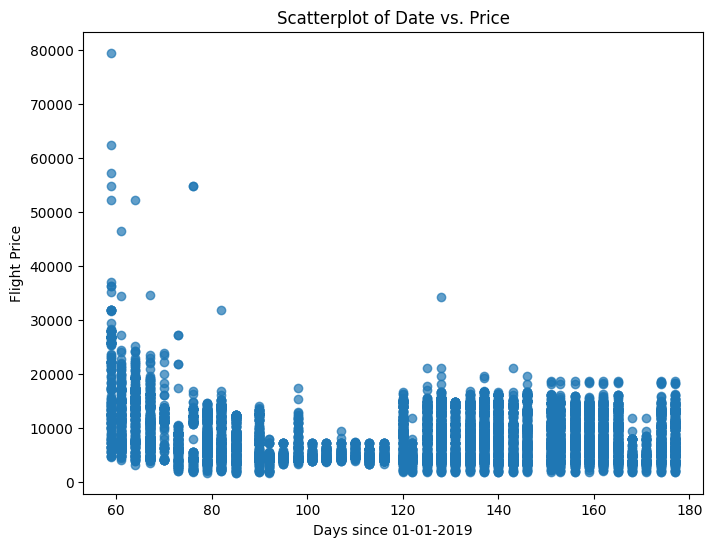

In [182]:
#Create scatterplot
plt.figure(figsize=(8, 6))
plt.scatter(df_flights["Date_of_Journey"], df_flights["Price"], alpha=0.7)
plt.xlabel('Days since 01-01-2019')
plt.ylabel('Flight Price')
plt.title('Scatterplot of Date vs. Price')
plt.show()

In [183]:
df_flights.groupby('Date_of_Journey')['Price'].describe().T

Date_of_Journey,59,61,64,67,70,73,76,79,82,85,90,92,95,98,101,104,107,110,113,116,120,122,125,128,131,134,137,140,143,146,151,153,156,159,162,165,168,171,174,177
count,199.000000,315.000000,402.000000,302.000000,142.000000,162.000000,156.000000,423.000000,323.000000,299.000000,257.000000,110.000000,100.00000,125.000000,63.000000,89.000000,67.000000,82.000000,92.000000,94.000000,277.000000,90.000000,281.000000,484.000000,259.000000,405.000000,504.000000,497.000000,286.000000,382.000000,342.000000,333.000000,503.000000,495.000000,493.000000,328.000000,105.000000,109.000000,351.000000,355.000000
mean,19517.849246,12033.615873,14000.194030,10391.784768,11607.154930,7137.796296,8926.858974,8011.418440,8755.755418,7406.575251,7448.124514,4395.163636,4805.36000,6462.984000,5124.031746,5126.101124,5344.940299,5573.000000,4965.500000,5209.989362,8692.072202,4671.255556,8724.822064,9763.592975,8522.447876,8771.612346,9860.662698,9845.796781,8777.720280,9133.007853,8987.330409,8925.921922,9567.029821,9611.317172,9210.277890,8636.332317,4707.371429,4950.724771,8663.404558,8669.157746
std,10668.819328,5161.810602,4709.484339,4689.342209,3556.067541,3666.487002,6780.571478,2922.818886,4076.631311,2885.754499,3146.129277,1209.036560,916.20067,2822.208075,1036.971381,991.380007,1155.456461,1049.098649,986.008442,1028.405944,3930.288418,1470.480870,3984.310220,4032.735704,3925.184185,3654.892417,3811.706369,3938.098825,4001.691873,4197.156764,3827.190764,3778.434961,3614.378535,3546.588012,3499.758004,3703.873495,1798.607379,1784.987695,3717.011433,3841.408689
min,4622.000000,4050.000000,3175.000000,3603.000000,4049.000000,2050.000000,1965.000000,1759.000000,2050.000000,1759.000000,1965.000000,1759.000000,3383.00000,3419.000000,3841.000000,3809.000000,3841.000000,3943.000000,3383.000000,3383.000000,1965.000000,1965.000000,1965.000000,1965.000000,1965.000000,1965.000000,1965.000000,1965.000000,1965.000000,1965.000000,1965.000000,1965.000000,1965.000000,1965.000000,2017.000000,1965.000000,1965.000000,1965.000000,1965.000000,1965.000000
25%,11812.000000,7648.000000,12056.000000,6781.250000,11087.000000,5399.250000,4382.250000,6041.000000,5340.000000,5678.000000,4957.000000,3925.000000,4174.00000,4441.000000,4300.500000,4319.000000,4423.000000,4675.000000,4174.000000,4423.000000,4804.000000,3858.250000,4823.000000,6734.000000,4804.000000,6027.000000,7128.250000,6878.000000,4823.000000,5674.250000,5985.000000,5769.000000,6795.000000,6614.000000,6152.000000,5596.500000,3543.000000,3807.000000,5657.000000,5395.500000
50%,18387.000000,11762.000000,15077.000000,9575.000000,12014.000000,6657.500000,10909.000000,7738.000000,8033.000000,6681.000000,7064.000000,4450.500000,4641.50000,5403.000000,4990.000000,4823.000000,5198.000000,5228.000000,4808.000000,4823.000000,8586.000000,4513.500000,8586.000000,9595.000000,8586.000000,8405.000000,10171.000000,9968.000000,8873.000000,8475.000000,9133.500000,8759.000000,10262.000000,10262.000000,8991.000000,8873.000000,4049.000000,4804.000000,8372.000000,8018.000000
75%,26890.000000,15141.000000,16736.000000,14053.000000,13817.000000,8855.000000,12284.000000,9707.500000,12173.000000,9254.000000,9258.000000,5021.750000,5177.00000,7363.000000,5617.000000,5912.000000,5919.000000,6434.000000,5613.000000,6093.750000,11467.000000,5224.000000,11982.000000,13029.000000,11450.000000,11281.000000,13029.000000,13029.000000,12086.250000,12898.000000,12154.500000,11627.000000,12692.000000,12692.000000,12488.000000,10919.000000,5201.000000,5678.000000,11753.000000,11525.000000
max,79512.000000,46490.000000,52285.000000,34608.000000,23843.000000,27210.000000,54826.000000,14629.000000,31945.000000,12537.000000,14151.000000,8040.000000,7229.00000,17531.000000,7229.000000,7229.000000,9564.000000,7452.000000,7229.000000,7229.000000,16704.000000,11982.000000,21219.000000,34273.000000,14781.000000,16840.000000,19644.000000,16655.000000,21219.000000,19644.000000,18804.000000,18804.000000,18804.000000,18804.000000,18804.000000,18804.000000,

The second most important variable is Date_of_Journey, which measures the number of days since January 1, 2019. This variable has a non-linear negative relationship with flight price. The negative relationship shows that flights were generally more expensive in the early days of this dataset (March) than in all other areas. The non-linearity further shows why the optimal model is a model that accounts for non-linearity in the data. Also, it appears that April is the least expensive month for flights, and there seems to be a one-week period sometime in June that is less expensive than all other periods. This drop in flight prices can be attributed to a lower demand for flights, which is caused by schools in India re-opening around late June, as well as monsoon season, which both discourage travel.

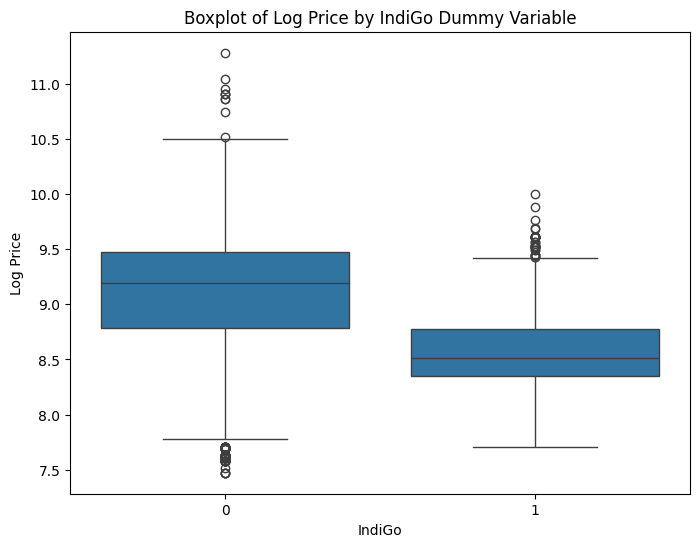

In [184]:
#Create boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_flights["Airline_IndiGo"], y=np.log(df_flights['Price']))
plt.title(f'Boxplot of Log Price by IndiGo Dummy Variable')
plt.xlabel("IndiGo")
plt.ylabel('Log Price')
plt.show()

The third most important variable by feature importance is the Airline_IndiGo dummy variable. The boxplot above shows that flights that did not solely use IndiGo as an airline were more expensive than IndiGo flights. This suggests that the IndiGo airline gives relatively cheap flights compared to all other airlines in the dataset.

## Part 3: Recommendations

Since flight duration is the most important feature by a wide margin, it would make sense to center most real-world price predictions around projected flight duration. However, the strategy for predicting flight prices by duration would not be as simple as one steady increase or decrease, as that would assume that duration is linearly related to price. Instead, the optimal strategy would split the projected flights into the following categories:

* Short (less than 5 hours)

* Moderate (5-10 hours)

* Long (10-30 hours)

* Very Long (30+ hours)

Prices would be partially determined by which category each flight falls into. Short flights would be the cheapest, long flights would be the second cheapest, very long flights would be more expensive, and moderate flights (the "sweet spot") would be the most expensive class of flights.

Another component of this prediction strategy is month of the flight. Since the data only spans from March to June, this component will only be useful for predicting flights within these months. According to this component, flights in March will be predicted to be the most expensive, May and June flights (except the third week in June) will be predicted to be moderately expensive, and April flights and flights in the third week of June will be predicted to be the cheapest.

The third main component is the airline being used for each flight. IndiGo and SpiceJet are projected to have the cheapest prices, while Jet Airways and flights with multiple carriers are expected to have the most expensive prices; all other airlines are somewhere in the middle.

In conclusion, the big three factors for predicting price are projected flight duration, time of year (only applicable from March-June), and airline being used, all of which have non-linear yet easy to interpret patterns.